In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pygmid import Lookup as lut
import os
from scipy.interpolate import interp1d

from IPython.core.display import Image
# filepath_Book_65nm_figs = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_65nm\\plots_LUTs_python\\Book_Chap1\\'
# fig_1_1_65nm = filepath_Book_65nm_figs + 'Book_Fig_1_1.png'
# Image(fig_1_1_65nm, width=800, height=800)

`Chap. 2 Introduction / Basic Transistor Modeling`
============================================
The purpose of this chapter is to `review physical aspects of MOS transistors` and to consider a few models that describe their behavior.  
  
**We begin with a physical model**: the charge sheet model (CSM), which lays the foundation for understanding the concept of inversion level, as promoted in this book.  
Since the **CSM is too complex for circuit design**, we look for simplifications and therefore introduce the *`“basic” EKV model`*.  
  
We make use of the latter to construct characteristics that are compared with those of real transistors. Because the basic EKV model is a long-channel model (like the CSM), it does not fit the characteristics of modern transistors (short-channel devices) with high accuracy.  
  
**`However, the intuition that the model provides sets the stage for the gm/ID-based sizing methodology studied in this book.`**

**`Before proceeding any further let's define the technology used below`**  
*By Default the Book 65nm models are used as to compare with the plots shown in the Book.*


In [5]:
filepath_dir = os.getcwd()
print(f"filepath_dir = {filepath_dir}")
str_technology = input("Please choose desired technology in nm: 65 (def), 180, 40, 28, 22) ")
str_vt = input('Please insert Vth flavor (svt, lvt, hvt): ')
str_mos_lib = input('Please insert MOS process (tt, ss or ff): ')
    
if str_technology == '180':
    filepath_dir = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_180nm\\'
    device1 = f'180nch_{str_vt}_mac_{str_mos_lib}_lib.mat'
    device2 = f'180pch_{str_vt}_mac_{str_mos_lib}_lib.mat'
elif str_technology == '40':
    filepath_dir = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_40nm\\'
    device1 = f'40nch_{str_vt}_mac_{str_mos_lib}_lib.mat'
    device2 = f'40pch_{str_vt}_mac_{str_mos_lib}_lib.mat'
elif str_technology == '28':
    filepath_dir = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_28nm\\'
    device1 = f'28nch_{str_vt}_mac_{str_mos_lib}_lib.mat'
    device2 = f'28pch_{str_vt}_mac_{str_mos_lib}_lib.mat'
elif str_technology == '22':
    filepath_dir = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_22nm\\'
    device1 = f'22nch_{str_vt}_mac_{str_mos_lib}_lib.mat'
    device2 = f'22pch_{str_vt}_mac_{str_mos_lib}_lib.mat'
else:
    filepath_dir = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_65nm\\'
    device1 = f'65nch_{str_vt}_mac_{str_mos_lib}_lib.mat'
    device2 = f'65pch_{str_vt}_mac_{str_mos_lib}_lib.mat'

filepath_dir_fig = filepath_dir + 'plots_LUTs_python\\Book_Chap2'
if not os.path.exists(filepath_dir_fig):
    # if the folder directory is not present then create it.
    print("Creating figures/plots directory.")
    os.makedirs(filepath_dir_fig)

filepath_dir = c:\Users\jruib\Documents_Local\GitHub\pygmid\Systematic_Analog_Design_LUTs\Chapter_2


### **`Chosen devices`**  

In [6]:
print(f"device1 = {device1}")
device1_LUT = filepath_dir+device1
print(f"device1_LUT = {device1_LUT}")

print(f"device2 = {device2}")
device2_LUT = filepath_dir+device2
print(f"device2_LUT = {device2_LUT}")
        
NCH = lut(device1_LUT)  # load MATLAB data into pygmid lookup object
PCH = lut(device2_LUT)  # load MATLAB data into pygmid lookup object       

device1 = 65nch_svt_mac_tt_lib.mat
device1_LUT = C:\Users\jruib\OneDrive\Documents\Systematic_Analog_Design\LUTs_65nm\65nch_svt_mac_tt_lib.mat
device2 = 65pch_svt_mac_tt_lib.mat
device2_LUT = C:\Users\jruib\OneDrive\Documents\Systematic_Analog_Design\LUTs_65nm\65pch_svt_mac_tt_lib.mat


In [7]:
str_save_Figs = input('Would you like to save the following Figures: (yes/no)')
if str_save_Figs == 'yes':
    save_Figs = True
    dpi = 600
else:
    save_Figs = False

In [8]:
VDSs = NCH['VDS']       # lookup object has pseudo-array access to data
W_lut = NCH['W']
L_lut = NCH['L']
L_Min = min(L_lut)
dev_Temp = NCH['TEMP']
VGSs = np.arange(0.4, 0.6, 0.05)
VGS_lut = NCH['VGS']
VBS_lut = NCH['VSB']

print(f"***********************************************")
print(f"VDSs = {VDSs}")
print(f"***********************************************")
print(f"W_LUT = {W_lut}")
print(f"***********************************************")
print(f"L_LUT = {L_lut}")
print(f"***********************************************")
print(f"VGS_LUT = {VGS_lut}")
print(f"***********************************************")
print(f"VBS_LUT = {VBS_lut}")
print(f"***********************************************")
print(f"dev_Temp = {dev_Temp}")
print(f"***********************************************")

***********************************************
VDSs = [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175
 1.2  ]
***********************************************
W_LUT = 10.0
***********************************************
L_LUT = [0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19
 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95 1.  ]
***********************************************
VGS_LUT = [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175
 1.2  ]
***********

In [9]:
from pygmid import EKV_param_extraction, XTRACT

In [10]:
def invq(Z_invq):
    # % FUNCTION evaluates y so that Z_invq = 2*(y - 1) + log(y),
    # % Z may be a scalar, a vector or a matrix.
    dimension_Z_invq = np.ndim(Z_invq)
    if dimension_Z_invq == 1:
        Z_invq = Z_invq.reshape(Z_invq.shape[0],1)
    m = np.shape(Z_invq)
    m1 = m[0]
    m2 = m[1]

    if m1 == 1:
        if m2 > 1:
            Z_invq = np.transpose(Z_invq)
            m3 = 1
        else:
            Z_invq = Z_invq
            m3 = m2
    else:
        Z_invq = Z_invq
        m3 = m2

    k = 1
    xx = np.zeros((len(Z_invq), m3))
    while k <= m3:
        y = Z_invq[:,(k-1)] # puts each column at a time in
        # [a1 b1] = find(y<=.1)  # returns [row col], so a1 is a list of rows and b1 list of colums, with
        # a1[0] and b1[0] being the coordinates of the 1st value <=0.1
        a1 = (y <= 0.1)
        # a1 = np.where(y <= 0.1)
        # Y = y[a1]
        x = np.ones((len(y), 1))
        if a1.any():
            Y = y[a1].reshape(y[a1].shape[0],1)
            e = 1
            u = Y + 2
            while np.max(abs(e)) >= 1e-8:
                d = Y - 2*(np.exp(u)-1) - u
                e = d/(2*np.exp(u) + 1)
                u = u + e
            # x[a1,:] = np.exp(u)
            x[a1,:] = np.exp(u)

        # [a2 b2] = find(y>.1); Y = y(a2);
        a2 = (y > 0.1)
        if a2.any():
            Y = y[a2].reshape(y[a2].shape[0],1)
            e = 1
            # X = 1e-4*b2
            X = np.ones((len(Y), 1))
            X = X*1e-4
            # print(X)
            while e >= 1e-4:
                z = 2*(X-1) + np.log(X)
                u = X*(1 + (Y-z)/(2*X+1))
                e = np.max(abs((u - X)/X))
                X = u
        # if size(a2) == 0:
        if not a2.any(): # check if there is any element equal to True in a2.
            # x = x # Makes x to be just the values which were below or equal to 0.1
            x = x[a1,:] # Drop all x elements where a2 = False, which are none!
        else:
            x[a2,:] = X

        xx[:,(k-1)] = np.reshape(x, -1)
        k = k + 1

    if m1 == 1:
        if m2 > 1:
            y = np.transpose(xx)
        else:
            y = xx
    else:
        y = xx

    return y
# **************************************************************

In [11]:
def to1D(x):
    y = np.reshape(x,-1)
    return y

In [12]:
def rndX(num, x):
    y = np.round(num,x)
    return y

In [13]:
round_t = 1.59876655113151
round_t1 = 0.21876655113151
print(rndX(round_t,3))
print(rndX(round_t1,5))

1.599
0.21877


In [14]:
def interpolated_intercepts(x, y1, y2):
    """Find the intercepts of two curves, given by the same x data"""

    def intercept(point1, point2, point3, point4):
        """find the intersection between two lines
        the first line is defined by the line between point1 and point2
        the first line is defined by the line between point3 and point4
        each point is an (x,y) tuple.

        So, for example, you can find the intersection between
        intercept((0,0), (1,1), (0,1), (1,0)) = (0.5, 0.5)

        Returns: the intercept, in (x,y) format
        """    

        def line(p1, p2):
            A = (p1[1] - p2[1])
            B = (p2[0] - p1[0])
            C = (p1[0]*p2[1] - p2[0]*p1[1])
            return A, B, -C

        def intersection(L1, L2):
            D  = L1[0] * L2[1] - L1[1] * L2[0]
            Dx = L1[2] * L2[1] - L1[1] * L2[2]
            Dy = L1[0] * L2[2] - L1[2] * L2[0]

            x = Dx / D
            y = Dy / D
            return x,y

        L1 = line([point1[0],point1[1]], [point2[0],point2[1]])
        L2 = line([point3[0],point3[1]], [point4[0],point4[1]])

        R = intersection(L1, L2)

        return R

    y_signs = np.sign(y1 - y2)    
    y_signs_diffs = np.diff(y_signs)    
    idxs_0 = np.argwhere(y_signs == 0.0)
    idxs = np.argwhere(y_signs_diffs != 0)

    xcs = []
    ycs = []
     
    for idx in idxs:
        xc, yc = intercept((x[idx], y1[idx]),((x[idx+1], y1[idx+1])), ((x[idx], y2[idx])), ((x[idx+1], y2[idx+1])))
        if xc in xcs:
            print(f"X-value already exists!")
        else:
            xcs.append(xc)
            ycs.append(yc)

    return np.array(xcs), np.array(ycs)

In [15]:
# Use pygmid XTRACT function
VDSs_i = 0.6
rho = 0.6

(VDS_EKV, n_EKV, VT_EKV, JS_EKV, d1n_EKV, d1VT_EKV, d1logJS_EKV, d2n_EKV, \
 d2VT_EKV, d2logJS_EKV) = EKV_param_extraction(NCH, mode = 1, L = L_Min, VDS = VDSs_i, VSB = 0.0, rho=rho)

# % XTRACT OUTPUTS =====================================
# % y = [VDS n VT JS d1n d1VT d1logJS d2n d2VT d2logJS];
print("\t\t\tEKV XTRACT Function\n\n")
print("y = [VDS n VT JS d1n d1VT d1logJS d2n d2VT d2logJS]\n")
print("n --> subthreshold slope factor, VT --> threshold voltage,\n")
print("JS --> Specific current density ( Is when W = 1um)\n")
print("remaining parameters are the sensitivities of each parameter to Vds, 1st and 2nd derivatives.\n")

print(f"EKV_param_extraction: VDS = {VDS_EKV*1e3:.1f} mV")
print(f"EKV_param_extraction: n = {n_EKV:.2f} ")
print(f"EKV_param_extraction: VT = {VT_EKV*1e3:.1f} mV")
print(f"EKV_param_extraction: JS = {JS_EKV*1e6:.1f} uA/um")
print(f"EKV_param_extraction: d1n = {d1n_EKV*1e3:.3f}*1e-3")
print(f"EKV_param_extraction: SVT d1VT = {d1VT_EKV*1e3:.3f}*1e-3")
print(f"EKV_param_extraction: SIS d1logJS = {d1logJS_EKV*1e3:.3f}*1e-3")
print(f"EKV_param_extraction: d2n = {d2n_EKV*1e3:.3f}*1e-3")
print(f"EKV_param_extraction: SVT2 d2VT = {d2VT_EKV*1e3:.3f}*1e-3")
print(f"EKV_param_extraction: SIS2/d2logJS = {d2logJS_EKV*1e3:.3f}*1e-3")

			EKV XTRACT Function


y = [VDS n VT JS d1n d1VT d1logJS d2n d2VT d2logJS]

n --> subthreshold slope factor, VT --> threshold voltage,

JS --> Specific current density ( Is when W = 1um)

remaining parameters are the sensitivities of each parameter to Vds, 1st and 2nd derivatives.

EKV_param_extraction: VDS = 600.0 mV
EKV_param_extraction: n = 1.47 
EKV_param_extraction: VT = 497.3 mV
EKV_param_extraction: JS = 7.5 uA/um
EKV_param_extraction: d1n = -8.811*1e-3
EKV_param_extraction: SVT d1VT = -82.902*1e-3
EKV_param_extraction: SIS d1logJS = 217.491*1e-3
EKV_param_extraction: d2n = 26.531*1e-3
EKV_param_extraction: SVT2 d2VT = 21.357*1e-3
EKV_param_extraction: SIS2/d2logJS = -84.189*1e-3


**`Greek Symbols`**  
$\alpha$, $\beta$, $\gamma$, $\delta$, $\epsilon$, $\zeta$, $\eta$, $\theta$, $\iota$
$\kappa$, $\lambda$, $\mu$, $\nu$, $\xi$, $\omicron$, $\pi$, $\rho$, $\sigma$, $\tau$  
$\upsilon$, $\phi$, $\chi$, $\psi$, $\omega$,  $\Omega$, $\Delta$, $\Sigma$

In [16]:
# skip this, this is just to display nice tables.
from itertools import zip_longest
class Table(list):
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            for col in row:
                try:
                    float(col)
                    html.append("<td>%.3f</td>" % col)
                except(ValueError):
                    html.append("<td><b>%s</b></td>" % col)
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## **`Fig 2.1 - Contribution of Drift & Diffusion Currents to total Current`**  
**Consider the common-source, saturated MOS transistor as an example.**  

*Assume that the doping concentration N of the substrate is equal to 10^17 atoms/cm^3, the gate oxide thickness is tox = 5 nm and µ*Cox = 345 uA/V^2.  
Because the source is grounded, VS is zero. We assume that the mobile charge density at the drain is also equal to zero since the transistor is saturated. Extracting ψSS and ψSD from (2.7), we find the drain current using (2.4) and (2.5).  
`Unfortunately, (2.7) can only be solved numerically. To overcome this problem, we make use of the surfpot(p, V, VG) function, which can be found in the Matlab toolbox accompanying this book.`*  

The obtained result is shown in Figure 2.1.  
  
The figure displays not only the current but also the contributions due to drift and diffusion. We see that in the right part of Figure 2.1, the drift current is larger than the diffusion current, meaning that strong inversion conditions prevail. Left, the diffusion current takes over, which corresponds to weak inversion.  
**Of particular interest is the point where drift and diffusion currents are equal. We will show further that the gate voltage at the intersection can be viewed as the threshold voltage, though the CSM truly ignores the concept of a threshold for the simple reason that it is essentially not a meaningful physical parameter.**

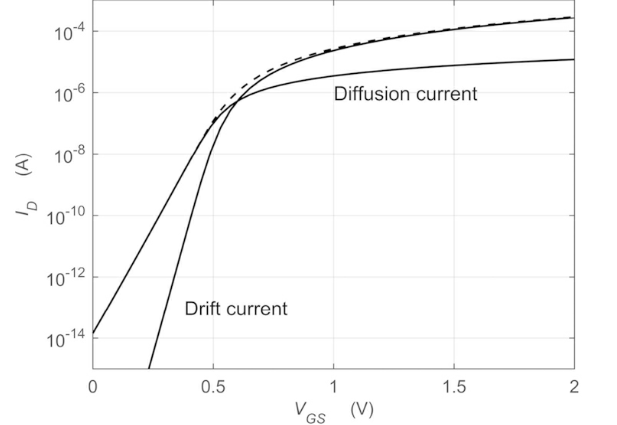

In [17]:
filepath_Book_65nm_figs = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_65nm\\plots_LUTs_python\\Book_Chap2\\'
fig_2_1_65nm = filepath_Book_65nm_figs + 'Book_Fig_2_1.png'
Image(fig_2_1_65nm, width=800, height=800)

The changing nature of the drain current when the gate voltage is swept from small to large values brings important consequences.  
  
`In weak inversion, the current varies exponentially with the gate voltage. In strong inversion, the drain current follows a quadratic law. The well-known quadratic and exponential drain current equations currently used by circuit designers represent acceptable approximations of these regions. It is important to be aware, however, that an increasing number of CMOS circuits do not operate in strong or weak inversion but in the so-called moderate inversion region, which lies in between. The trouble is that there aren’t any simple models for this region.`  
  
The CSM coalesces weak and strong inversion and describes the passage from one mode to another in a continuous manner. `Unfortunately, because an analytical expression of the surface potential is lacking, the model is impractical for circuit design. A rigorous and simple continuous physical model that lends itself to hand-sizing of CMOS circuits throughout all possible modes of operation does not exist.` 
  
**We will show below that the so-called EKV model is a valuable alternative.**

## **`The transconductance Efficiency gm/ID`**  
  
Because the slope of ID(VGS) is largest and essentially constant in weak inversion, gm/ID plateaus in this region. We will show later that the maximum of gm/ID is equal to 1/(nUT) where n is the subthreshold slope factor. Generally, n lies between 1.2 and 1.5 in a bulk technology, and is somewhat smaller for silicon-on-insulator (SOI) transistors.4 The maximum possible gm/ID is obtained when n is equal to one, yielding 1/UT = 38.46 S/A at room temperature. This is what bipolar junction transistors (BJTs) achieve. Usually, the maximum transconductance efficiency of bulk MOS transistors lies between 20 and 30 S/A.
  
For larger VGS beyond weak inversion, gm/ID decreases. Values of 20 to 10 S/A, correspond to moderate inversion, whereas smaller values, for example between 8 and 2 S/A, correspond to strong inversion. Since these ranges don’t change significantly with the transistor technology, it is legitimate to use gm/ID as a proxy that represents the inversion level of a MOS transistor. Thus, it is possible to target any desired inversion level by choosing gm/ID, and there is no need to know the gate-to-source voltage.


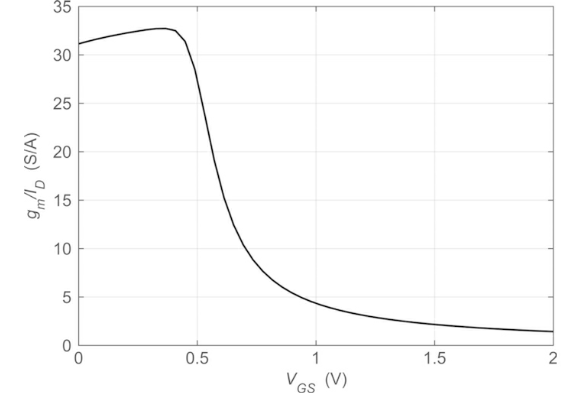

In [18]:
filepath_Book_65nm_figs = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_65nm\\plots_LUTs_python\\Book_Chap2\\'
fig_2_4_65nm = filepath_Book_65nm_figs + 'Book_Fig_2_4.png'
Image(fig_2_4_65nm, width=800, height=800)

## **`2.2 - The Basic EKV Model`**  
**The EKV model is the outcome of pioneering work at the Centre Electronique Horloger (CEH) in Switzerland. The name recognizes the contributions of C. Enz, F. Krummenacher and E. Vittoz.**  

*Two distinct transport mechanisms define the drain current of MOS transistors: drift and diffusion. Their contributions are illustrated by the first and second term inside the brackets of the drain current expression below:*

$I_D = \mu W (-Q_i*d\psi_s/dx + U_T * dQ_i/dx )$ `(2.1)`  
  
`The drift current is proportional to the electrical field represented by the derivative of the surface potential ψS with respect to the distance x along the channel. The diffusion current is proportional to the mobile charge density gradient represented by the derivative with respect to x of the mobile charge density Qi.`*  

From the following simplification:

$d(-Q_i/C_{ox}) = -n d \psi_s$ `(2.11)`  
  
It is now possible to substitute the charge density $Q_i$ to find the surface potential $\psi_s$. For this purpose we introduce the normalized mobile charge density $q$, defined as:
  
$q = - \frac {Q_i} {2nU_TC_{ox}}$ `(2.12)`  
  
This lets us rewrite 2.11 as:

$d\psi_s = -2U_Tdq$ `(2.13)`  
  
and we can now integrate 2.1 to find:
  
$i = (q_S^2 + q_S) - (q_D^2 + q_D)$ `(2.14)`

`where we call $q_S$ and $q_D$ the normalized mobile charge densities at the source and drain,5 respectively. The variable $i$ ($IC$ or inversion coefficient) is the normalized drain current, defined as:`
  
$i = IC = I_D/I_S$ `(2.15)`
  
Here, $I_S$ is the specific current, given by:  
  
$I_S = 2nU_T^2 * \mu Cox * W/L = 2nU_T^2 * \beta = I_{Ssq} * W/L $ `(2.16)`  
  
`In this expression, the introduction of ISsq, which is the specific current of a square transistor (W = L), offers the possibility to separate what depends on the technology (n, μ and Cox) and what is controlled by the circuit designer (W/L). Notice that IS can also be written as the product of 2*n*UT^2 times β, the so-called current factor.`  

**The basic EKV model makes use of a second equation that connects the non-equilibrium voltage V to q, the normalized mobile charge density along the channel. Which after integration does not require the surface potential (ψS) anymore:**

`The result is shown below, where we call VP the pinch-off voltage and the subscript x represents either the source S or the drain D, depending on the terminal that we consider:`
  
$V_P - V_x = U_T [2(q_x - 1) + log(q_x)]$ `(2.19)`  
  
*The above expression relates the non-equilibrium voltage $V_x$ along the channel to the local normalized mobile charge density $q_x$. At the source, $V_x$ becomes $V_S$, and the normalized mobile charge density is $q_S$, while at the drain we have $V_D$ and $q_D$. When $q_x = 1$, the non-equilibrium voltage $V_x$ equals $V_P$.*  
  
`At this point, drift and diffusion currents are equal and we are in the middle of the moderate inversion region.`  
  
*When $V_x$ gets smaller than $V_P$, we enter strong inversion. Conversely, when $V_x$ is larger than $V_P$, we enter weak inversion.* 
  
**Equations (2.14) and (2.19) let us link the normalized drain current $i$ ($IC$) to the pinch-off voltage $V_P$ as we turn the normalized mobile charge density into a parameter. When the source is grounded ($V_S = 0$) and the transistor is saturated ($q_D = 0$), the normalized drain current ($q$ substituted by $q_S$) boils down to the semilog curve shown in Figure 2.5(a). Note that this curve does not use any other quantity than UT.*


## **`Fig 2.5 - The Normalized drain current, i = IC, of a grounded-source saturated NMOS versus the Pinch-Off voltage Vp.`**  

In [19]:
# % data ===============
T = 300

# % compute ==============
kB = 1.38e-23
qe = 1.602e-19
UT = kB*T/qe
print(f"UT = {UT*1000} mV.")
qs = np.logspace(-4,2,num=100)
print(f"len(qs) = {len(qs)}.")
i = qs**2 + qs
VP = UT*(2*(qs-1) + np.log(qs))

D = 1/(UT*(qs + 1)) # dlog(i)/dVP
# gm_ID = NCH.look_up('GM_ID', L=L, VDS=VDS)
# gm_W = NCH.look_up('GM_W', L=L, VDS=VDS)

UT = 25.842696629213485 mV.
len(qs) = 100.


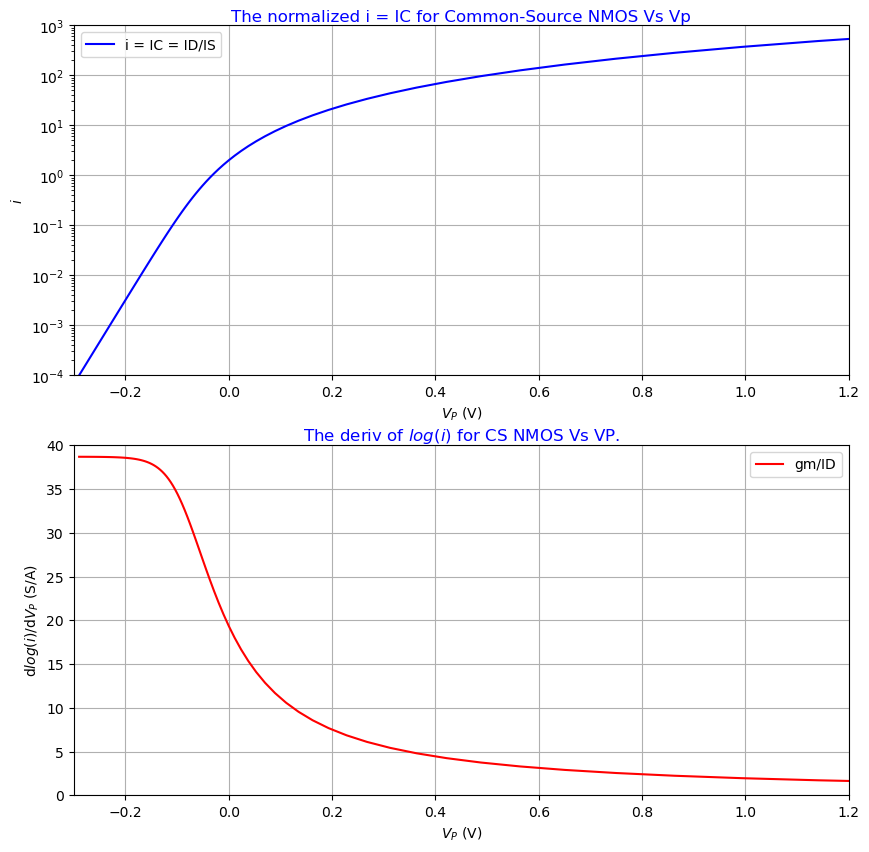

In [20]:
# % plot ====================
# plt.style.use('classic')
plt.rcParams.update(plt.rcParamsDefault)
fig5, axs5 = plt.subplots(2,1,figsize=(10,10))
label1 = 'i = IC = ID/IS'
label2 = 'gm/ID'

title_dict = dict(fontsize=12, fontweight=2, color="blue", verticalalignment='center', horizontalalignment='center')
bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)

axs5[0].semilogy(VP, i, 'b-', label = label1)
axs5[0].grid(True)
axs5[0].set_ylabel(f'$i$')
axs5[0].set_xlabel(f'$V_P$ (V)')

axs5[0].set_ylim(bottom=1e-4, top=1e3)
axs5[0].set_xlim(left=-0.3, right=1.2)
axs5[0].legend()

# res_str_gmID = f'Max gm/ID = {np.max(gm_ID):0.1f} (S/A).'
# axs5[0].annotate(res_str_gmID,
#              ((0.9), (0.7)), # these are the coordinates to position the label
#              xycoords='axes fraction',  # 'data' ; 'axes fraction' ; 'figure pixels'
#              color='black',
#              bbox=bbox_props,
#              ha='right') # center, left, right
axs5[0].set_title(f'The normalized i = IC for Common-Source NMOS Vs Vp', title_dict)

axs5[1].plot(VP, D, 'r-', label = label2)
axs5[1].grid(True)

axs5[1].set_ylabel(f'd$log(i)$/d$V_P$ (S/A)')
axs5[1].set_xlabel(f'$V_P$ (V)')

axs5[1].set_ylim(bottom=0, top=40)
axs5[1].set_xlim(left=-0.3, right=1.2)
axs5[1].legend()
axs5[1].set_title(f'The deriv of $log(i)$ for CS NMOS Vs VP.', title_dict)

if save_Figs:
    dpi = 600
    fig_EKV_i_2_5 = filepath_dir_fig + f'\\Fig_2_5_EKV_i_Vs_VP_and_dlogi_ov_dVP_pygmid'
    print(f"Saving figure: {fig_EKV_i_2_5}")
    plt.savefig(fig_EKV_i_2_5 + '.png', dpi = dpi, bbox_inches='tight')

plt.show()
# **************************************************************
# **************************************************************

**Taking the derivative of the log-scaled normalized drain current i with respect to VP yields the curve shown in Figure 2.5(b).**

$\frac{\partial log(i)}{\partial V_P} = 1/U_T * 1/(q+1)$ `(2.20)`  
  
`Note that when q << 1 (weak inversion), the expression boils down to the reciprocal of the thermal voltage UT. When q is equal to one, (2.20) equals the reciprocal of 2UT, right in the middle of the moderate inversion region. On the other hand, making q much larger than one places the device in the strong inversion region.`
  
**What we need now is a connection linking VP to the gate voltage VG. We know already from the plot of Example 2.1 that the pinch-off voltage and the gate voltage vary together. Based on this observation, (2.21) establishes a linear link.**
  
$V_P = (V_G - V_T) / n$ `(2.21)`  
  
`This expression incorporates two parameters, the subthreshold slope n (introduced earlier) and the threshold voltage VT.`  
A particularity of the latter is that it is defined with respect to the bulk, like VP, VS and VD.  
**The voltage difference (VT – VS) is thus simply the commonly accepted concept of threshold voltage defined with respect to the source, while the difference (VG – VT) represents the gate overdrive VOV, also commonly used in the literature.**


### **`Let us summarize`**
Two equations, (2.14) and (2.19), form the basis of basic EKV model. To reproduce the ID(VGS) characteristics, we use (2.15) and (2.21) to perform vertical and horizontal shifts of i(VP) (through IS and VT, respectively) as well as scaling (through n).  
  
**`This enables the modeling of ID versus VGS using only three parameters:`**   

 * 1. the subthreshold slope factor, $n$,

 * 2. the specific current, $I_S$,

 * 3. the threshold voltage, VT.
  

## **`Fig 2.6 - Drain current ID Vs Vgs with drift and diffusion contributions predicted by basic EKV Model.`**  
  
For a saturated MOS transistor ($q_D = 0$) in a grounded-source configuration ($V_S = 0$), we can replace $q_S$ with $q$, since the only terminal that matters is the source. Equations (2.14) and (2.15) then lead to:  
 * $i = (q_S^2 + q_S) - (q_D^2 + q_D)$ `(2.14)`  
 * $i = IC = I_D/I_S$ `(2.15)`  
  
$I_D = I_S * (q^2 + q)$ `(2.22)`  
  
Likewise, (2.19) modifies as shown below, since the non-equilibrium voltage at the source is zero ($V_x = V_S = 0$):
 * $V_P - V_x = U_T [2(q_x - 1) + log(q_x)]$ `(2.19)`  

$V_P = U_T [2(q - 1) + log(q)]$ `(2.23)`  

All we need to do now to plot $I_D$ versus $V_{GS}$ is to eliminate q between (2.22) and (2.23). To find the actual gate-to-source voltage $V_{GS}$ and drain current $I_D$, we make use of (2.21) and (2.15).  
 * $V_P = (V_G - V_T) / n$ `(2.21)`  
  
**Figure 2.6 shows the result for $q$ ranging from $10^−4$ (deep weak inversion) to $10^1$ (strong inversion), assuming $n$, $I_S$, and $V_T$ equal to $1.3$, $1 \mu A$, and $0.4 V$, respectively.**  
*The figure also shows the contributions of the drift and diffusion currents, proportional to $q^2$ and $q$, respectively, while the sum is the drain current $I_D$. Note that at the point where drift and diffusion currents are equal, $q$ is equal to one, thus $V_p$ is equal to zero.*  
**Hence, $V_G$ equals $V_T$ at this point.**
 

In [21]:
# # % data ===============
n   = 1.3 # % slope factor
IS  = 1e-6  # % specific current A
VT  = .4    # % threshold voltage V
step = .02
VG  = np.arange(0, 1.2+step, step)  # % gate voltage V

# # % compute ==============
kB = 1.38e-23
qe = 1.602e-19
# UT = kB*T/qe
UT = 0.026
print(f"UT = {UT*1000} mV.")
VP = (VG - VT)/n
qS = invq(VP/UT)
i = qS**2 + qS
ID = i*IS
VG = n*VP + VT

drift_ID = qS**2*IS
diffusion_ID = qS*IS

drift_ID_1D = to1D(drift_ID)
diffusion_ID_1D = to1D(diffusion_ID)
# new method!
xc, yc = interpolated_intercepts(VG,diffusion_ID_1D,drift_ID_1D)
print(f"xc = {xc} \n")
print(f"yc = {yc} \n")
# plt.semilogy(xc, yc, 'co', ms=5, label='Nearest data-point, with linear interpolation')

UT = 26.0 mV.
X-value already exists!
xc = [[0.4]] 

yc = [[1.e-06]] 



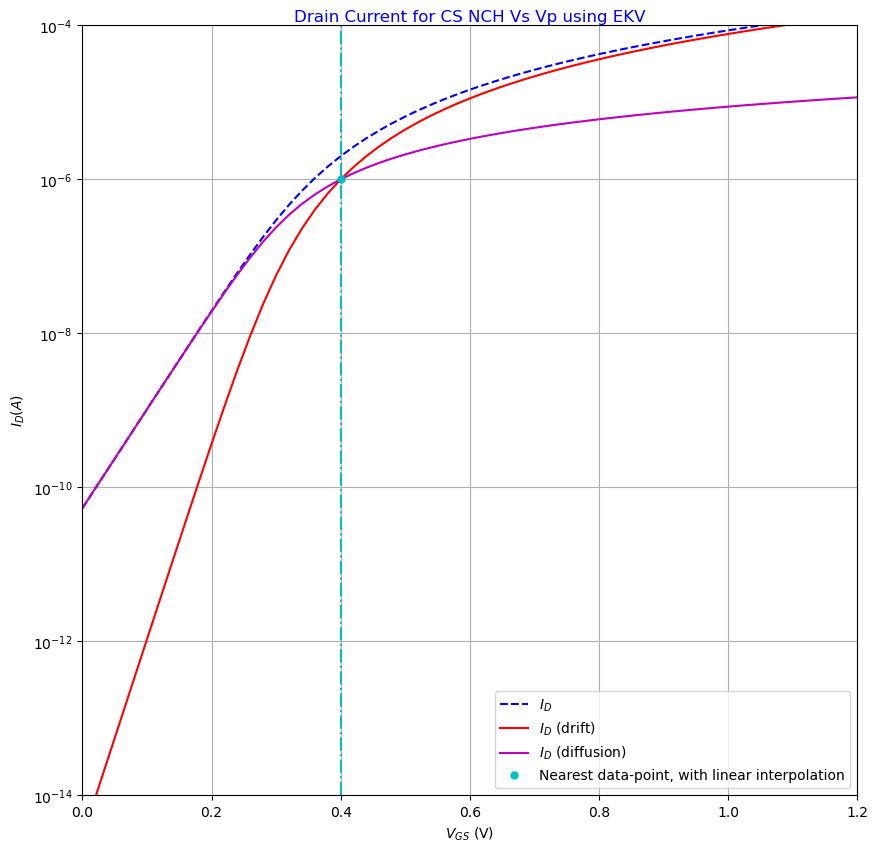

In [22]:
# % plot ====================
# plt.style.use('classic')
plt.rcParams.update(plt.rcParamsDefault)
fig, axs = plt.subplots(1,1,figsize=(10,10))
# axs.set_facecolor("white")
label1 = '$I_D$'
label2 = '$I_D$ (drift)'
label3 = '$I_D$ (diffusion)'

title_dict = dict(fontsize=12, fontweight=2, color="blue", verticalalignment='center', horizontalalignment='center')
# Axes.set_title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)[source]
bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)

# plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

axs.semilogy(VG, ID, '--b', label = label1)
axs.grid(True)
axs.semilogy(VG, drift_ID, 'r', label = label2)
axs.semilogy(VG, diffusion_ID, 'm', label = label3)
# *******************************
axs.semilogy(xc, yc, 'co', ms=5, label='Nearest data-point, with linear interpolation')
axs.semilogy([to1D(xc), to1D(xc)], [1e-14, 1e-4], '-.c', ms=5)
# *******************************
axs.set_ylabel(f'$I_D (A)$')
axs.set_xlabel('$V_{GS}$ (V)')

axs.set_ylim(bottom=1e-14, top=1e-4)
axs.set_xlim(left=0, right=1.2)
# axs[0].set_xscale("log")
axs.legend()

axs.set_title(f'Drain Current for CS NCH Vs Vp using EKV', title_dict)

if save_Figs:
    dpi = 600
    fig_EKV_i_2_6 = filepath_dir_fig + f'\\Fig_2_6_EKV_ID_Vs_VGS_drift_diffusion_EKV_pygmid'
    print(f"Saving figure: {fig_EKV_i_2_6}")
    plt.savefig(fig_EKV_i_2_6 + '.png', dpi = dpi, bbox_inches='tight')

plt.show()

### **Example using Linear Interpolation**

xcs = [[3.07980908]
 [6.41234825]
 [9.23845378]] 

ycs = [[0.06159618]
 [0.12824697]
 [0.18476908]] 



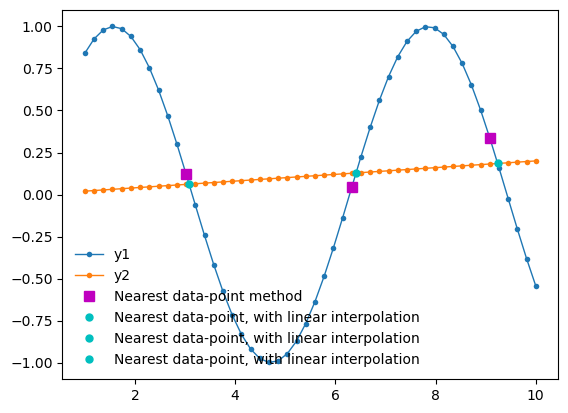

In [26]:
x  = np.linspace(1, 10, 50)
y1 = np.sin(x)
y2 = 0.02*x

plt.plot(x, y1, marker='o', mec='none', ms=4, lw=1, label='y1')
plt.plot(x, y2, marker='o', mec='none', ms=4, lw=1, label='y2')

idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)

plt.plot(x[idx], y1[idx], 'ms', ms=7, label='Nearest data-point method')

# new method!
xcs, ycs = interpolated_intercepts(x,y1,y2)
print(f"xcs = {xcs} \n")
print(f"ycs = {ycs} \n")
for xc, yc in zip(xcs, ycs):
    plt.plot(xc, yc, 'co', ms=5, label='Nearest data-point, with linear interpolation')

plt.legend(frameon=False, fontsize=10, numpoints=1, loc='lower left')
# plt.savefig('curve crossing.png', dpi=200)
plt.show()

## **`Approximations of the EKV Model.`**  
  
**In strong and weak inversion, the EKV model of the grounded-source saturated transistor boils down to well-known expressions.**  
*`For example, in strong inversion, since q >> 1, the drift current, which is proportional to q^2, dominates over the diffusion current. Hence:`*  
 * $V_P = U_T[ 2(q-1) + \log {(q)}]$ `(2.23)` $\rightarrow$ $V_P \approx 2 U_T q $  
 * $i = (q^2 + q)$ `(2.14)/(2.22)` $\rightarrow$ $q \approx \sqrt {i} $   
  
$V_P \approx 2 U_T q \approx 2U_T \sqrt {i} = 2 U_T \sqrt {I_D/I_S}$ `(2.24)`  

*`This approximation leads to the square-law model after replacing V_P using (2.21):`*  
 * $V_P = (V_G - V_T) / n$ `(2.21)`  

$I_D = \mu C_{ox} \frac {W}{L} * \frac {(V_{GS} - V_{TH})^2} {2n} = \frac {\beta}{2n} * (V_{GS} - V_{TH})^2$ `(2.25)`  

*The somewhat unusual subthreshold slope factor in the denominator of (2.25) reflects the fact that the constant $n$ affects the threshold voltage in the basic EKV model (back-gate effect).*  
  
**`In weak inversion, where q << 1, we find:`**  
  
$V_P \approx U_T*[-2 + \log (q)] \approx U_T*[-2 + \log (i)] \approx U_T*[-2 + \log (I_D/I_S)]$ `(2.26)`  

**`This leads to the well-known weak inversion exponential approximation:`**  
  
$I_D = I_S * \exp {[2 - V_{TH}/(nU_T)]} * \exp {[V_G/(nU_T)]} = I_0 * \exp {[V_G/(nU_T)]}$ `(2.27)`  

**This expression corroborates the fact that the subthreshold factor $n$ sets the slope of the ID(VGS) characteristic on a semilog plot.**
Figure 2.7 illustrates the strong and weak inversion approximations using the same EKV parameters as in Figure 2.6, indicating satisfactory asymptotic trends. To define the boundaries between weak, moderate and strong inversion, the plot contains markers for the normalized mobile charge density q. We see that the basic EKV model approaches the exponential (weak inversion) and quadratic (strong inversion) approximations around 0.2 and 5, respectively. Between these landmarks, the device operates in moderate inversion. The center of moderate inversion is signified by q = 1 and VG = VT. We will utilize these boundaries throughout this book to distinguish between the three possible inversion levels.

### **Figure 2.7 illustrates the strong and weak inversion approximations using the same EKV parameters as in Figure 2.6, indicating satisfactory asymptotic trends.**  
  
To define the boundaries between weak, moderate and strong inversion, the plot contains markers for the normalized mobile charge density $q$.  
  
**`We see that the basic EKV model approaches the exponential (weak inversion) and quadratic (strong inversion) approximations around 0.2 and 5, respectively. Between these landmarks, the device operates in moderate inversion. The center of moderate inversion is signified by q = 1 and VG = VT.`**  
  
**We will utilize these boundaries throughout this book to distinguish between the three possible inversion levels.**

In [27]:
# % data ===============
L   = .1
step = .001
VGS = np.arange(0, 1.2+step, step)
VDS = 1.0
UT  = .026

# % EKV ======================
n  = 1.2
VT = np.array(0.4)  # VT must be np array to multiply with [1,1] to create vertical line in plot.
JS = 1e-6

# % strong inversion ==========
beta = JS/(2*n*UT**2)
GVO  = (VGS-VT)
M    = GVO >=0
JDsi  = beta*GVO[M]**2/(2*n)

# % weak inversion ============
Jo  = JS*np.exp(2 - VT/(n*UT))
JDwi = Jo*np.exp(VGS/(n*UT))

# % all inversion levels ======
q = np.logspace(-5,1.5,num=50)
JD = JS*(q**2 + q)
VP = UT*(2*(q-1) + np.log(q))
VGS_EKV = n*VP + VT

q1 = np.array([ .2, .5, 1, 2, 5 ])
JD1 = JS*(q1**2 + q1)
VP1 = UT*(2*(q1-1) + np.log(q1))
VGS1_EKV = n*VP1 + VT

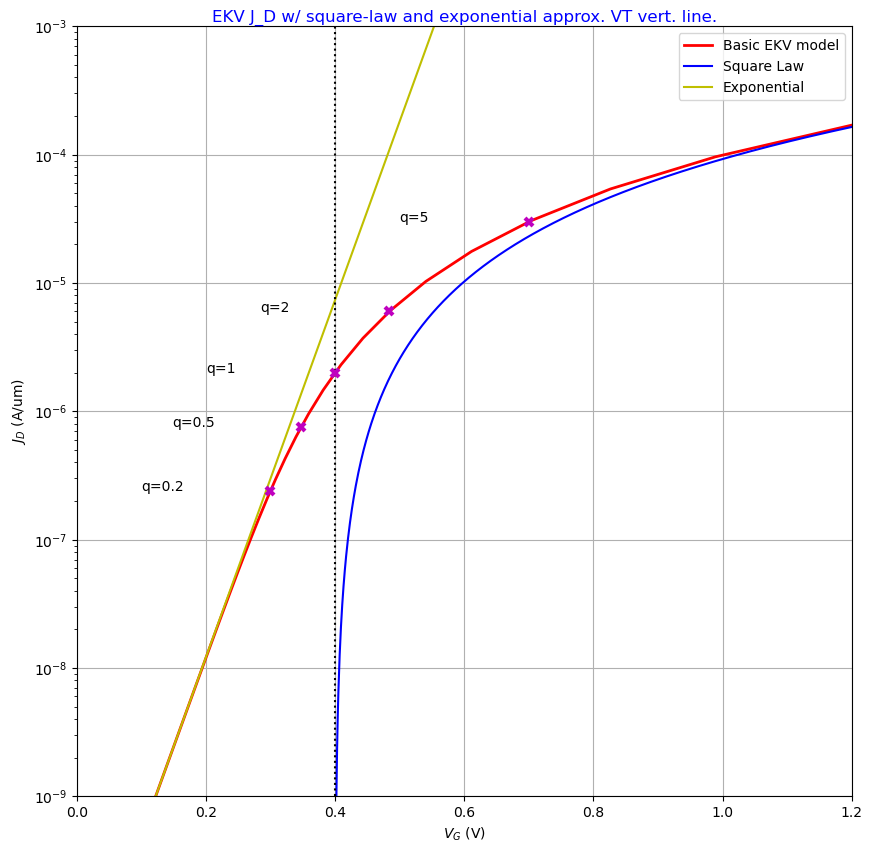

In [28]:
# % plot ====================
# plt.style.use('classic')
plt.rcParams.update(plt.rcParamsDefault)
fig, axs = plt.subplots(1,1,figsize=(10,10))
label1 = 'Basic EKV model'
label2 = 'Square Law'
label3 = 'Exponential'

title_dict = dict(fontsize=12, fontweight=2, color="blue", verticalalignment='center', horizontalalignment='center')
bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)

axs.semilogy(VGS_EKV, JD, 'r-', linewidth=2, label = label1)
axs.grid(True)
axs.semilogy(VGS[M],JDsi, 'b-', linewidth=1.5, label = label2)
axs.semilogy(VGS, JDwi, 'y-', linewidth=1.5, label = label3)

axs.semilogy(VT*[1, 1],[1e-9, 1e-3],'k:')
axs.semilogy(VGS1_EKV,JD1, 'mx', markeredgewidth=3, linewidth=3)

axs.set_ylabel(f'$J_D$ (A/um)')
axs.set_xlabel(f'$V_G$ (V)')

axs.set_ylim(bottom=1e-9, top=1e-3)
axs.set_xlim(left=0, right=1.2)

axs.annotate('q=0.2',((VGS1_EKV[0]-0.2), (JD1[0])))
axs.annotate('q=0.5',((VGS1_EKV[1]-0.2), (JD1[1])))
axs.annotate('q=1',((VGS1_EKV[2]-0.2), (JD1[2])))
axs.annotate('q=2',((VGS1_EKV[3]-0.2), (JD1[3])))
axs.annotate('q=5',((VGS1_EKV[4]-0.2), (JD1[4])))

axs.legend()
axs.set_title(f'EKV J_D w/ square-law and exponential approx. VT vert. line.', title_dict)

if save_Figs:
    dpi = 600
    fig_EKV_J_D_2_7 = filepath_dir_fig + f'\\Fig_2_7_EKV_J_D_for_All_Inv_Levels_jba'
    print(f"Saving figure: {fig_EKV_J_D_2_7}")
    plt.savefig(fig_EKV_J_D_2_7 + '.png', dpi = dpi, bbox_inches='tight')

plt.show()

# **************************************************************

`Figure 2.7 Basic EKV model with square-law and exponential approximations. The vertical line marks the threshold voltage (VT).`

## **`Basic EKV Model Expressions for gm and gm/ID.`**  
  
**The transconductance of the saturated grounded-source MOS transistor can be derived from (2.22) and (2.23).**  
*`We see that it is proportional to the normalized mobile charge density q and IS, which contains W/L.`*  
 * $V_P = U_T[ 2(q-1) + \log {(q)}]$ `(2.23)`
 * $I_D = I_S*(q^2 + q)$ `(2.22)`
 * $V_P = (V_G - V_T) / n$ `(2.21)`  
  
$g_m = \frac{\partial I_D}{\partial V_G} = \frac{\partial I_D}{\partial q} * \frac{\partial q}{\partial V_G} = I_S (2q+1) * \frac{1}{nU_T} \frac{q}{2q+1} = \frac{I_S}{nU_T} q$ `(2.28)`  
  
**As stated in Section 2.2.1, the transconductance efficiency gm/ID is a useful proxy for the inversion level. It boils down to a simple function of the normalized mobile charge density q, obtained by dividing (2.28) by (2.22):**  
  
$\frac{g_m}{I_D} = \frac{1}{nU_T} \frac{1}{q+1}$  `(2.29)`  
  
`Deep in weak inversion, where q << 1, the transconductance efficiency reaches a maximum equal to:`  
  
$M = max(\frac{g_m}{I_D}) = \frac{1}{nU_T}$  `(2.30)`  
  
Dividing (2.29) by (2.30) leads to the concept of normalized transconductance efficiency $\rho$:  
  
$\rho = \frac{g_m/I_D}{max(g_m/I_D)} = \frac{1}{q+1}$  `(2.31)`  
  
*`ρ varies between 0 (deep in strong inversion) and 1 (deep in weak inversion).`*  
**In the middle of moderate inversion, ρ is equal to 0.5, since q is equal to one.**  
  
**`An alternative expression for gm/ID, which can be helpful when the current is given, is obtained when the normalized mobile charge density, q, in (2.29) is replaced by the normalized drain current i, after inverting (2.22):`**
* $x^2+bx+c=0 \implies x=\frac{-b \pm \sqrt{b^2-4c}}{2}$  
* $i = q^2 + q \rightarrow q^2 + q - i = 0 \rightarrow q = \frac{1}{2} *(-1 \pm \sqrt{1^2 - 4*I_D/I_S})$  
  
$\frac{g_m}{I_D} = \frac{1}{nU_T} * \frac{2}{\sqrt{1 + 4*I_D/I_S} + 1} = \frac{1}{nU_T} * 2 / [\sqrt{1 + 4*I_D*L/(I_{Ssq}*W)} + 1]$  `(2.32)`  

**Finally, the counterpart of (2.30) for the square-law approximation in strong inversion (SI) is given by the well-known expression below [8]:**  
  
$(\frac{g_m}{I_D})_{SI} = \frac{2}{V_G - V_T}$  `(2.33)`  


## **`Figure 2.8 plots the normalized transconductance efficiency for the basic EKV model (2.31)`**

**Along with its square-law (2.33) and exponential (2.30) approximations. The (+) marks denote the same range of normalized mobile charge densities q as in Figure 2.7. We see that moderate inversion ($q = 0.2 … 5$) corresponds to the steepest section of the curve.**

In [29]:
# % data ===============
L   = .1
step = .01
VGS = np.arange(0, 1.2+step, step)
VDS = 1.0
UT  = .026

# % EKV ======================
n  = 1.2
VT = np.array(0.4)  # VT must be np array to multiply with [1,1] to create vertical line in plot.
JS = 1e-6

# % strong inversion ==========
beta = JS/(2*n*UT**2)
GVO  = (VGS-VT)
M    = GVO >=0
JDsi  = beta*GVO[M]**2/(2*n)

# % weak inversion ============
Jo  = JS*np.exp(2 - VT/(n*UT))
JDwi = Jo*np.exp(VGS/(n*UT))

# % all inversion levels ======
q = np.logspace(-5,1.5,num=50)
rho = 1/(1 + q) # JD = JS*(q**2 + q)
# rho(p) is normalized transconductance efficiency, and varies from 0 deep in si
# to 1 deep in wi. In the middle of moderate inversion, p = 0.5, since q = 1.
VP = UT*(2*(q-1) + np.log(q))
VGS_EKV = n*VP + VT

q1 = np.array([ .2, .5, 1, 2, 5 ])
rho1 = 1/(1 + q1)  # JD1 = JS*(q1**2 + q1)
VP1 = UT*(2*(q1-1) + np.log(q1))
VGS1_EKV = n*VP1 + VT

C:\Users\jruib\AppData\Local\Temp\ipykernel_17280\2318957403.py:13: RuntimeWarning: divide by zero encountered in divide
  axs.plot(VGS,2*n*UT/(VGS - VT), 'b-', linewidth=1.5, label = label2)


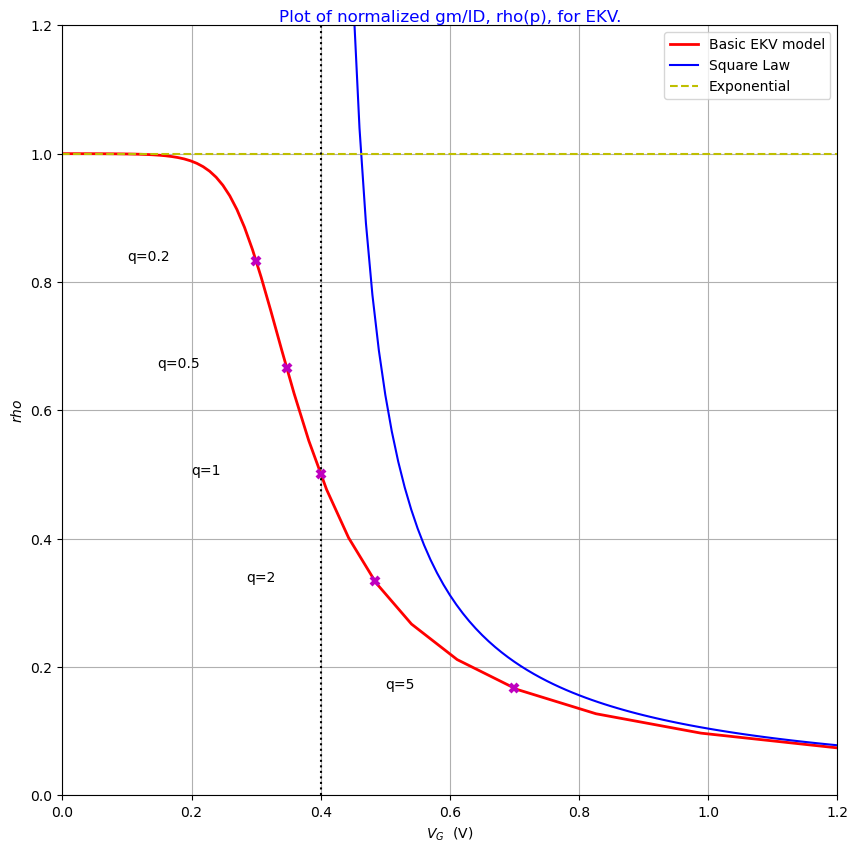

In [31]:
# % plot ====================
plt.rcParams.update(plt.rcParamsDefault)
fig, axs = plt.subplots(1,1,figsize=(10,10))
label1 = 'Basic EKV model'
label2 = 'Square Law'
label3 = 'Exponential'

title_dict = dict(fontsize=12, fontweight=2, color="blue", verticalalignment='center', horizontalalignment='center')
bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)

axs.plot(VGS_EKV, rho, 'r-', linewidth=2, label = label1)
axs.grid(True)
axs.plot(VGS,2*n*UT/(VGS - VT), 'b-', linewidth=1.5, label = label2)
axs.plot([0, 1.2],[1, 1], 'y--', linewidth=1.5, label = label3)

axs.plot(VT*[1, 1],[0, 1.2],'k:')
axs.plot(VGS1_EKV,rho1, 'mx', markeredgewidth=3, linewidth=3)

axs.set_ylabel(f'$rho$')
axs.set_xlabel(f'$V_G$  (V)')

axs.set_ylim(bottom=0, top=1.2)
axs.set_xlim(left=0, right=1.2)

axs.annotate('q=0.2',((VGS1_EKV[0]-0.2), (rho1[0])))
axs.annotate('q=0.5',((VGS1_EKV[1]-0.2), (rho1[1])))
axs.annotate('q=1',((VGS1_EKV[2]-0.2), (rho1[2])))
axs.annotate('q=2',((VGS1_EKV[3]-0.2), (rho1[3])))
axs.annotate('q=5',((VGS1_EKV[4]-0.2), (rho1[4])))

axs.legend()

axs.set_title(f'Plot of normalized gm/ID, rho(p), for EKV.', title_dict)

if save_Figs:
    dpi = 600
    fig_EKV_J_D_2_8 = filepath_dir_fig + f'\\Fig_2_8_EKV_Norm_Transc_Efficiency_gm_ID_jba'
    print(f"Saving figure: {fig_EKV_J_D_2_8}")
    plt.savefig(fig_EKV_J_D_2_8 + '.png', dpi = dpi, bbox_inches='tight')

plt.show()
# **************************************************************

## **`EKV Parameter Extraction`**
  
**In this section, we ask the question: How can we extract the basic EKV model parameters from a given MOS transistor’s characteristics?**  
  
**`The suggested procedure is as follows:`**
* 1. We compute (numerically) the derivative of $\log{(ID)}$ with respect to $V_{GS}$, i.e. we plot the $g_m/I_D(V_{GS})$ characteristic shown in the lower right corner of Figure 2.9.  
We extract the subthreshold slope $n$ from the maximum $M$ of the transconductance efficiency (see (2.30)). 
* 2. To find $V_T$ and $I_S$, we select a second point on the $g_m/I_D$ curve (as $V_{GS} = V_{GSo}$) and assess the corresponding drain current and transconductance efficiency, respectively ($I_{Do}$ and $(g_m/I_D)_o$). 
* 3. Since we already know the subthreshold slope, we find the normalized mobile charge density $q_o$ by inverting (2.29). 
* 4. Having $q_o$, we compute the normalized drain current $i_o$ and the pinch-off voltage $V_{Po}$ using (2.22) and (2.23). 
* 5. Finally, making use of (2.15) and (2.21), we find the specific current $I_S$ and the threshold voltage $V_T$.

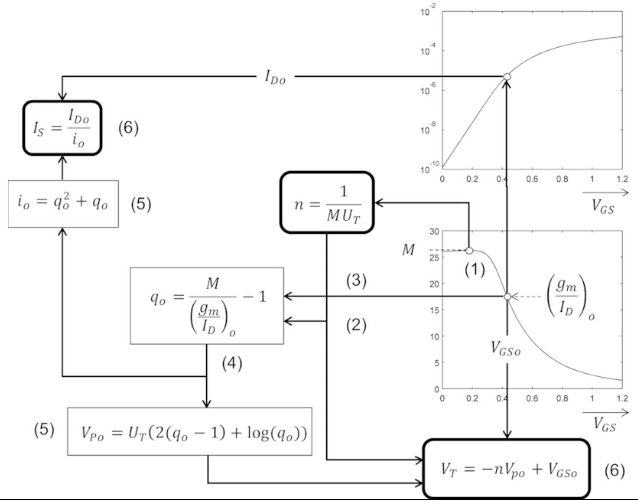

In [32]:
filepath_Book_65nm_figs = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_65nm\\plots_LUTs_python\\Book_Chap2\\'
fig_2_9_65nm = filepath_Book_65nm_figs + 'Book_Fig_2_9.png'
Image(fig_2_9_65nm, width=800, height=800)

**Figure 2.9 Extraction procedure for the parameters n, VT and IS from the saturated ID and gm/ID characteristics.**

## **`Real Transistors`**
  
**`Can we use the basic EKV model to describe the behavior of “real” modern transistors?`**  
 
**`The direct answer is no, since the simple EKV model that we considered does not include mobility degradation or important second-order effects that play a significant role in short-channel devices.`**  
  
*In the context of this book, we solve this problem by employing lookup tables containing drain currents, small-signal parameters, capacitances, etc., all extracted either from physical devices or from advanced models like those used in circuit simulators like SPICE (BSIM6 or PSP).*  
  
**The simulation data used throughout this book consists of a multi-dimensional DC sweep and steps VGS and VDS from 0 to the nominal process supply voltage (1.2 V). The data (including many small-signal parameters across the sweep) were exported from Cadence Spectre to MATLAB using the Spectre Matlab Toolbox. The created data files (65nch.mat and 65pch.mat) can be read into Matlab to look up various device parameters against one another.**  

In [33]:
# % data ===============
VGS_lut = NCH['VGS']
L_lut = NCH['L']
L_Min = min(L_lut)
dev_Temp = NCH['TEMP']
L   = np.array([L_Min, 0.1, 0.5])
step = .3
VDS = np.arange(0.6, 1.2+step, step)

# % compute ==============
# JD = NCH.look_up('ID_W',VGS=VGS,VDS=VDS,L=L)
Id = np.empty((len(VGS_lut), len(VDS), len(L)))
print(f"Creating empty Id matrix with shape --> {Id.shape} (Vgs's, Vds's, L's)")
for k in range(0,len(L)):
    print(f"k={k}")
    print(f"L[k]={L[k]}")
    Id[:,:,k] = NCH.look_up('ID', VDS= VDS, L=L[k]) # % Id(Vgs,Vds,L)
# NCH.look_up('ID', VDS= VDS, L=L_Min)

Creating empty Id matrix with shape --> (49, 3, 3) (Vgs's, Vds's, L's)
k=0
L[k]=0.06
k=1
L[k]=0.1
k=2
L[k]=0.5


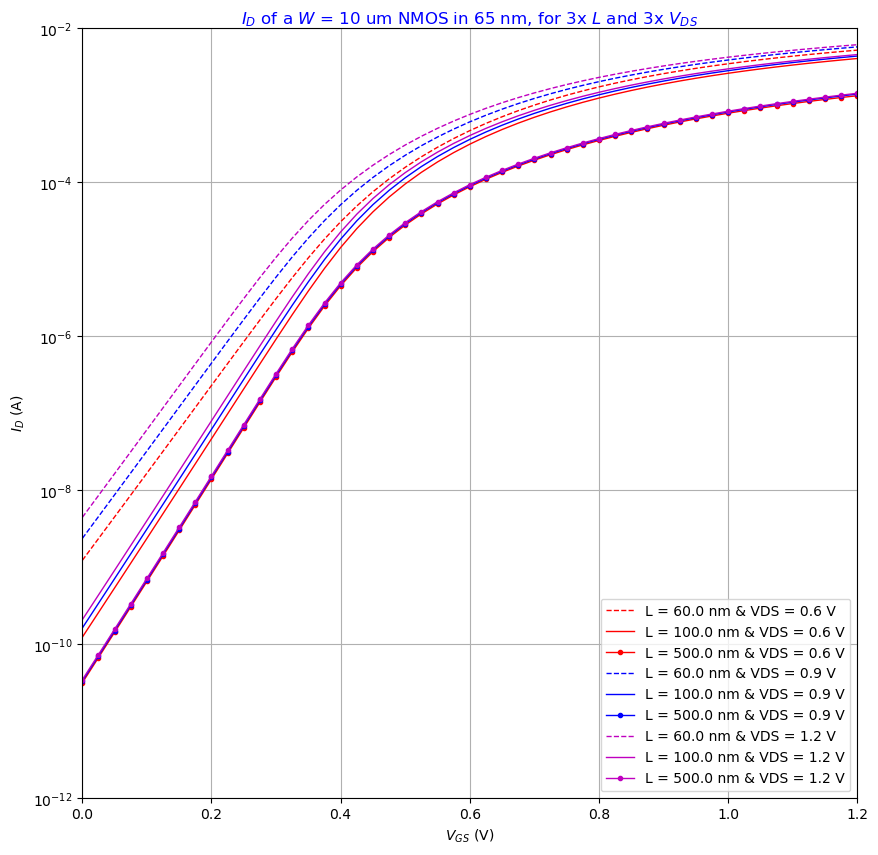

In [34]:
# % plot ====================
plt.rcParams.update(plt.rcParamsDefault)
fig, axs = plt.subplots(1,1,figsize=(10,10))
# ********************************************************
label1 = f'L = {L[0]*1000} nm & VDS = {VDS[0]} V'
label2 = f'L = {L[1]*1000} nm & VDS = {VDS[0]} V'
label3 = f'L = {L[2]*1000} nm & VDS = {VDS[0]} V'
# ********************************************************
label4 = f'L = {L[0]*1000} nm & VDS = {VDS[1]:.1f} V'
label5 = f'L = {L[1]*1000} nm & VDS = {VDS[1]:.1f} V'
label6 = f'L = {L[2]*1000} nm & VDS = {VDS[1]:.1f} V'
# ********************************************************
label7 = f'L = {L[0]*1000} nm & VDS = {VDS[2]:.1f} V'
label8 = f'L = {L[1]*1000} nm & VDS = {VDS[2]:.1f} V'
label9 = f'L = {L[2]*1000} nm & VDS = {VDS[2]:.1f} V'
# ********************************************************

title_dict = dict(fontsize=12, fontweight=2, color="blue", verticalalignment='center', horizontalalignment='center')
bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)

# ********************************************************
axs.semilogy(VGS_lut, Id[:,0,0], 'r--', linewidth=1, label = label1)
axs.grid(True)
axs.semilogy(VGS_lut,Id[:,0,1], 'r-', linewidth=1, label = label2)
axs.semilogy(VGS_lut,Id[:,0,2], 'r.-', linewidth=1, label = label3)

axs.semilogy(VGS_lut, Id[:,1,0], 'b--', linewidth=1, label = label4)
axs.semilogy(VGS_lut,Id[:,1,1], 'b-', linewidth=1, label = label5)
axs.semilogy(VGS_lut,Id[:,1,2], 'b.-', linewidth=1, label = label6)

axs.semilogy(VGS_lut, Id[:,2,0], 'm--', linewidth=1, label = label7)
axs.semilogy(VGS_lut,Id[:,2,1], 'm-', linewidth=1, label = label8)
axs.semilogy(VGS_lut,Id[:,2,2], 'm.-', linewidth=1, label = label9)

axs.set_ylabel(f'$I_D$ (A)')
axs.set_xlabel(f'$V_G$$_S$ (V)')

axs.set_ylim(bottom=1e-12, top=1e-2)
axs.set_xlim(left=0, right=1.2)
axs.legend()

axs.set_title(f'$I_D$ of a $W$ = 10 um NMOS in 65 nm, for 3x $L$ and 3x $V_D$$_S$', title_dict)

if save_Figs:
    dpi = 600    
    fig_EKV_J_D_2_12 = filepath_dir_fig + f'\\Fig_2_12_Real_Transistors_ID_Vs_VGS_Vs_VDS_Vs_L_65nm_jba'
    print(f"Saving figure: {fig_EKV_J_D_2_12}")
    plt.savefig(fig_EKV_J_D_2_12 + '.png', dpi = dpi, bbox_inches='tight')

plt.show()
# **************************************************************


**`Looking at the representation of Figure 2.12, one of the differences with respect to earlier plots is that the current of real transistors depends on the drain voltage.`**  
  
**Two mechanisms explain this.**  
 * `Channel length modulation (CLM)`
 * `drain-induced barrier lowering (DIBL)`  
  
**To explain these effects, consider the region near the drain junction. As VDS increases, the width of the depleted region surrounding the drain junction tends to increase. The result is a slight decrease of the effective length of the inversion layer. Therefore, because the effecive L is getting smaller, $W/L$ increases, which in turn increases the drain current. This is what is meant by channel length modulation.**  
  
**The second effect, DIBL, becomes relevant once the channel length falls below approximately $0.5 \mu m$. The depletion region surrounding the drain then takes over a significant share of the fixed space charge region under the channel. Thus, the amount of fixed charge controlled by the gate reduces.**  
**`Smaller gate voltages are therefore needed to induce the same amount of drain current. This is equivalent to a slight decrease of the threshold voltage, which enhances the gate overdrive (VGS – VT), and thus also increases the drain current.`**  
  
`This phenomenon is visible in the 100-nm weak inversion characteristic of Figure 2.12 and more pronounced in the 60-nm characteristic.`  
  
**`We see that DIBL shifts the weak inversion drain current characteristic to the left as the drain voltage grows. The effect becomes very significant when L is equal to 60 nm but on the other hand almost vanishes for L = 500 nm, where CLM causes only minor changes, making the three curves controlled by the drain voltage almost coincide. Notice also the significant reduction of the drain current slope in weak inversion, when L is equal to 60 nm.`**  
  
*Observe that the current grows exponentially in weak inversion until we enter moderate inversion. Here, the slope (or gm/ID) starts to decrease, reducing further in strong inversion.*  
  
**`An interesting question to pose at this point is whether we can extract basic EKV parameters for the real drain current characteristics in Figure 2.12 and achieve a good match.`**  
  
*Clearly, this won’t be possible unless we make the parameters a function of VDS, L and VSB. In other words, each curve in Figure 2.12 will require a different set of parameters.*  
  
In the following example, we will first determine how good of a match we can achieve with this approach. Later in this chapter, we will show that despite this apparent complication, the basic EKV modeling approach is in fact useful for understanding and quantifying gate length and drain voltage dependencies in modern transistors.*


In [45]:
# % data ===============
VGS_lut = NCH['VGS']
L_lut = NCH['L']
L_Min = min(L_lut)
dev_Temp = NCH['TEMP']
Li   = np.array([L_Min, 0.12, 0.5])
step = .3
# T = 300
VDS = np.arange(0.6, 1.2+step, step)
VSB = 0.0

# % A) ==================
L = Li[0]
# % real transistor --------------
Id1  = NCH.look_up('ID', VDS=VDS, L=L)
Vgs = VGS_lut

# % EKV model -------
UT = .026
N = 20
# q  = logspace(-5,1.1,N)';
q  = np.logspace(-5,1.1,num=N)
i  = q**2 + q
VP = UT*(2*(q-1) + np.log(q))

# Use pygmid XTRACT function
rho = 0.6

(VDS_EKV1, n_EKV1, VT_EKV1, JS_EKV1, d1n_EKV1, d1VT_EKV1, d1logJS_EKV1, d2n_EKV1, \
 d2VT_EKV1, d2logJS_EKV1) = EKV_param_extraction(NCH, mode = 1, L = L, VDS = VDS, VSB = VSB, rho=rho)
n1 = n_EKV1
VT1 = VT_EKV1
IS1 = 10*JS_EKV1
# print(n_EKV1)
# print(VT_EKV1)
# print(IS1)
i_shape = i.shape[0]
print(f" i.shape = {i.shape}")
i = i.reshape(i_shape, 1)
print(f"New i.shape = {i.shape}")
ID1 = i*IS1
print(f" ID1 = {ID1}")

[1.47080859 1.46913129 1.46798814]
[0.49727165 0.4732516  0.45014557]
[7.52002935e-05 7.96702462e-05 8.32174003e-05]
 i.shape = (20,)
New i.shape = (20, 1)
 ID1 = [[7.52010455e-10 7.96710429e-10 8.32182325e-10]
 [1.57500256e-09 1.66862170e-09 1.74291365e-09]
 [3.29870781e-09 3.49478507e-09 3.65038320e-09]
 [6.90903393e-09 7.31971125e-09 7.64560636e-09]
 [1.44715021e-08 1.53316973e-08 1.60143097e-08]
 [3.03150063e-08 3.21169493e-08 3.35468905e-08]
 [6.35187134e-08 6.72943056e-08 7.02904464e-08]
 [1.33154213e-07 1.41068983e-07 1.47349789e-07]
 [2.79412172e-07 2.96020607e-07 3.09200317e-07]
 [5.87553408e-07 6.22477952e-07 6.50192504e-07]
 [1.24091257e-06 1.31467319e-06 1.37320631e-06]
 [2.64437055e-06 2.80155359e-06 2.92628701e-06]
 [5.73761966e-06 6.07866737e-06 6.34930756e-06]
 [1.28910526e-05 1.36573048e-05 1.42653683e-05]
 [3.08339203e-05 3.26667079e-05 3.41211259e-05]
 [8.14007196e-05 8.62392295e-05 9.00788541e-05]
 [2.44275689e-04 2.58795590e-04 2.70317932e-04]
 [8.35285149e-04 8.84

In [50]:
# % data ===============
VGS_lut = NCH['VGS']
L_lut = NCH['L']
L_Min = min(L_lut)
dev_Temp = NCH['TEMP']
Li   = np.array([L_Min, 0.12, 0.5])
step = .3
# T = 300
VDS = np.arange(0.6, 1.2+step, step)
VSB = 0.0

# *******************************************************************************
# *******************************************************************************
# *******************************************************************************
# % A) ==================
L = Li[0]
# % real transistor --------------
Id1  = NCH.look_up('ID', VDS=VDS, L=L)
Vgs = VGS_lut

# % EKV model -------
UT = .026
N = 20
# q  = logspace(-5,1.1,N)';
q  = np.logspace(-5,1.1,num=N)
i  = q**2 + q
VP = UT*(2*(q-1) + np.log(q))

# Use pygmid XTRACT function
rho = 0.6

(VDS_EKV1, n_EKV1, VT_EKV1, JS_EKV1, d1n_EKV1, d1VT_EKV1, d1logJS_EKV1, d2n_EKV1, \
 d2VT_EKV1, d2logJS_EKV1) = EKV_param_extraction(NCH, mode = 1, L = L, VDS = VDS, VSB = VSB, rho=rho)
n1 = n_EKV1
VT1 = VT_EKV1
IS1 = 10*JS_EKV1
print(f"n_EKV1 = {n_EKV1}")
print(f"VT_EKV1 = {VT_EKV1}")
print(f"IS1 = {IS1}")

# Convert i from (20,) to (20,1) in order to be able to multiply with (1,X) array
i_shape = i.shape[0]
# print(f" i.shape = {i.shape}")
i = i.reshape(i_shape, 1)
# print(f"New i.shape = {i.shape}")
ID1 = i*IS1  # does not work if they are kept as numpy arrays with return shape as (20,) and (3,)
# need to have explicit np array with shape (20,1) and (1,3) to multiply! Otherwise need to transform np
# arrays into np matrix --> IS1_matrix = np.matrix(IS1)

VP_shape = VP.shape[0]
# print(f"VP.shape = {VP.shape}")
VP = VP.reshape(VP_shape, 1)
# print(f"New VP.shape = {VP.shape}")

# VG1 = VP*n1 + VT1[np.ones((N,1)),:]
# DO same as --> VT1[np.ones((N,1)),:]
VT1_holder = np.ones((N,3))
VT1_repN = VT1_holder * VT1
VG1 = VP*n1 + VT1_repN

# *******************************************************************************
# *******************************************************************************
# *******************************************************************************
# % B) =====================
L = Li[1]
# % real transistor ---------
Id2 = NCH.look_up('ID', VDS=VDS, L=L)

# % EKV model -------
(VDS_EKV2, n_EKV2, VT_EKV2, JS_EKV2, d1n_EKV2, d1VT_EKV2, d1logJS_EKV2, d2n_EKV2, \
 d2VT_EKV2, d2logJS_EKV2) = EKV_param_extraction(NCH, mode = 1, L = L, VDS = VDS, VSB = VSB, rho=rho)
n2 = n_EKV2
VT2 = VT_EKV2
IS2 = 10*JS_EKV2
ID2 = i*IS2
# # VG2 = VP*n2 + VT2(ones(N,1),:);
# VG2 = VP*n2 + VT2[np.ones((N,1)),:]
# DO same as --> VT2[np.ones((N,1)),:]
VT2_holder = np.ones((N,3))
VT2_repN = VT2_holder * VT2
VG2 = VP*n2 + VT2_repN

# *******************************************************************************
# *******************************************************************************
# *******************************************************************************
# % C) ==========================
L = Li[2]
# % real transistor ---------
Id3 = NCH.look_up('ID', VDS=VDS, L=L)

# % EKV model -------
(VDS_EKV3, n_EKV3, VT_EKV3, JS_EKV3, d1n_EKV3, d1VT_EKV3, d1logJS_EKV3, d2n_EKV3, \
 d2VT_EKV3, d2logJS_EKV3) = EKV_param_extraction(NCH, mode = 1, L = L, VDS = VDS, VSB = VSB, rho=rho)
n3 = n_EKV3
VT3 = VT_EKV3
IS3 = 10*JS_EKV3
ID3 = i*IS3
# # VG3= VP*n3 + VT3(ones(N,1),:);
# VG3 = VP*n3 + VT3[np.ones((N,1)),:]
# DO same as --> VT3[np.ones((N,1)),:]
VT3_holder = np.ones((N,3))
VT3_repN = VT3_holder * VT3
VG3 = VP*n3 + VT3_repN


n_EKV1 = [1.47080859 1.46913129 1.46798814]
VT_EKV1 = [0.49727165 0.4732516  0.45014557]
IS1 = [7.52002935e-05 7.96702462e-05 8.32174003e-05]


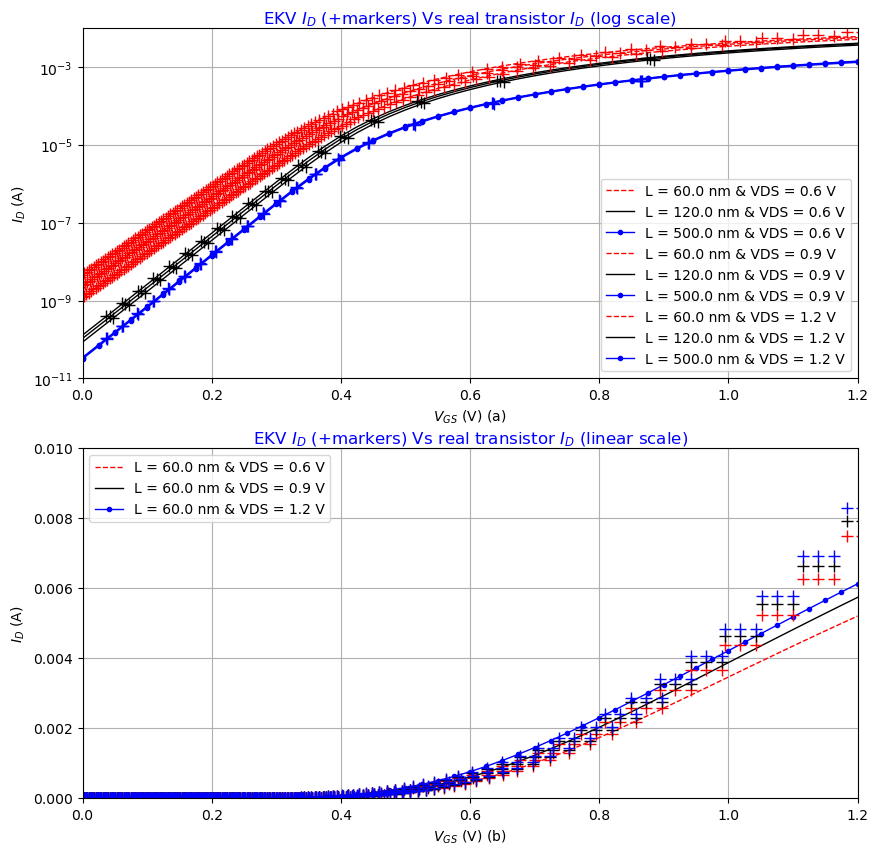

In [54]:
# % plot ====================
plt.rcParams.update(plt.rcParamsDefault)
fig, axs = plt.subplots(2,1,figsize=(10,10))
# **********************************************************
label1 = f'L = {Li[0]*1000} nm & VDS = {VDS[0]} V'
label2 = f'L = {Li[1]*1000} nm & VDS = {VDS[0]} V'
label3 = f'L = {Li[2]*1000} nm & VDS = {VDS[0]} V'
# **********************************************************
label4 = f'L = {Li[0]*1000} nm & VDS = {VDS[1]:.1f} V'
label5 = f'L = {Li[1]*1000} nm & VDS = {VDS[1]:.1f} V'
label6 = f'L = {Li[2]*1000} nm & VDS = {VDS[1]:.1f} V'
# **********************************************************
label7 = f'L = {Li[0]*1000} nm & VDS = {VDS[2]:.1f} V'
label8 = f'L = {Li[1]*1000} nm & VDS = {VDS[2]:.1f} V'
label9 = f'L = {Li[2]*1000} nm & VDS = {VDS[2]:.1f} V'
# **********************************************************

title_dict = dict(fontsize=12, fontweight=2, color="blue", verticalalignment='center', horizontalalignment='center')
bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)

# **********************************************************
axs[0].semilogy(Vgs, Id1[:,0], 'r--', linewidth=1, label = label1)
axs[0].grid(True)
axs[0].semilogy(Vgs, Id2[:,0], 'k-', linewidth=1, label = label2)
axs[0].semilogy(Vgs, Id3[:,0], 'b.-', linewidth=1, label = label3)
# **********************************************************
axs[0].semilogy(Vgs, Id1[:,1], 'r--', linewidth=1, label = label4)
axs[0].semilogy(Vgs, Id2[:,1], 'k-', linewidth=1, label = label5)
axs[0].semilogy(Vgs, Id3[:,1], 'b.-', linewidth=1, label = label6)
# **********************************************************
axs[0].semilogy(Vgs, Id1[:,2], 'r--', linewidth=1, label = label7)
axs[0].semilogy(Vgs, Id2[:,2], 'k-', linewidth=1, label = label8)
axs[0].semilogy(Vgs, Id3[:,2], 'b.-', linewidth=1, label = label9)
# **********************************************************
axs[0].semilogy(VG1, ID1, 'r+', linewidth=1.5, markersize=8)
axs[0].semilogy(VG2, ID2, 'k+', linewidth=1.5, markersize=8)
axs[0].semilogy(VG3, ID3, 'b+', linewidth=1.5, markersize=8)
# **********************************************************
axs[0].set_xlabel(f'$V_G$$_S$ (V) (a)')
axs[0].set_ylabel(f'$I_D$ (A)')
# **********************************************************
axs[0].set_ylim(bottom=1e-11, top=1e-2)
axs[0].set_xlim(left=0, right=1.2)
# **********************************************************
axs[0].legend()
axs[0].set_title(f'EKV $I_D$ (+markers) Vs real transistor $I_D$ (log scale)', title_dict)

# Data points for Linear scale plot
M = 150
# q  = logspace(-5,1.1,N)';
q  = np.logspace(-5,1.1,num=M)
i  = q**2 + q
VP = UT*(2*(q-1) + np.log(q))
# Convert i from (20,) to (20,1) in order to be able to multiply with (1,X) array
i_shape = i.shape[0]
# print(f" i.shape = {i.shape}")
i = i.reshape(i_shape, 1)
# print(f"New i.shape = {i.shape}")
ID1 = i*IS1  

VP_shape = VP.shape[0]
# print(f"VP.shape = {VP.shape}")
VP = VP.reshape(VP_shape, 1)
# print(f"New VP.shape = {VP.shape}")

# VG1 = VP*n1 + VT1[np.ones((N,1)),:]
# DO same as --> VT1[np.ones((N,1)),:]
VT1_holder = np.ones((M,3))
VT1_repN = VT1_holder * VT1
VG1 = VP*n1 + VT1_repN

axs[1].plot(Vgs, Id1[:,0], 'r--', linewidth=1, label = label1)
axs[1].grid(True)
axs[1].plot(Vgs, Id1[:,1], 'k-', linewidth=1, label = label4)
axs[1].plot(Vgs, Id1[:,2], 'b.-', linewidth=1, label = label7)

axs[1].plot(VG1, ID1[:,0], 'r+', linewidth=1.5, markersize=8)
axs[1].plot(VG1, ID1[:,1], 'k+', linewidth=1.5, markersize=8)
axs[1].plot(VG1, ID1[:,2], 'b+', linewidth=1.5, markersize=8)

axs[1].set_xlabel(f'$V_G$$_S$ (V) (b)')
axs[1].set_ylabel(f'$I_D$ (A)')

axs[1].set_ylim(bottom=0, top=0.01)
axs[1].set_xlim(left=0, right=1.2)

axs[1].legend()
axs[1].set_title(f'EKV $I_D$ (+markers) Vs real transistor $I_D$ (linear scale)', title_dict)

if save_Figs:
    dpi = 600    
    fig_EKV_J_D_2_13 = filepath_dir_fig + f'\\Fig_2_13_EKV_ID_Vs_Real_Transistors_ID_65nm_jba'
    print(f"Saving figure: {fig_EKV_J_D_2_13}")
    plt.savefig(fig_EKV_J_D_2_13 + '.png', dpi = dpi, bbox_inches='tight')

plt.show()
# **************************************************************

**`The parameters are extracted from lookup functions with appropriate gate lengths and drain voltages using the XTRACT function.`**  
  
**The reconstructed characteristics are compared to the original data in Figure 2.13. The agreement is generally satisfactory, but not in strong inversion, since the model does not take into account the impact of increasing electrical fields on mobility [8]. Recall that the basic model ignores mobility degradation and therefore overestimates the drain currents in strong inversion. The point is clearly visible in Figure 2.13(b) where the original and reconstructed characteristics for L equal to 60 nm diverge increasingly when VGS gets large.**  
  
**`The observation on mobility degradation brings us back to the parameter extraction algorithm, and in particular the location of the second reference point. We must avoid the strong inversion data because it is affected by mobility degradation. On the other hand, we prefer to be as far away from weak inversion as possible, to avoid a loss of accuracy. Therefore, an optimum exists in moderate inversion. We recommend choosing the point such that the normalized transconductance efficiency ρ is in the range between 0.5 and 0.8. The XTRACT function has one optional variable (“rho”) that specifies this, the default value being 0.6.`**

In [55]:
# %----------------------------------------------------------------------
# % --------------------------- Example 2.3 -----------------------------
# %----------------------------------------------------------------------
# % data ===============
VGS_lut = NCH['VGS']
L_lut = NCH['L']
L_Min = min(L_lut)
dev_Temp = NCH['TEMP']
L = 0.1
step = .3
VDS = np.arange(0.6, 1.2+step, step)
VSB = 0.0

# % compute ==============
# % real transistor --------------
gm_ID= NCH.look_up('GM_ID',VDS=VDS,L=L)
JD = NCH.look_up('ID_W',VDS=VDS,L=L)

# % -- EKV model -----
# % EKV extract param =================
UT = .026
N = 50
q  = np.logspace(-6,1,num=N)
i  = q**2 + q
VP = UT*(2*(q-1) + np.log(q))

rho = 0.6
(VDS_EKV1, n_EKV1, VT_EKV1, JS_EKV1, d1n_EKV1, d1VT_EKV1, d1logJS_EKV1, d2n_EKV1, \
 d2VT_EKV1, d2logJS_EKV1) = EKV_param_extraction(NCH, mode = 1, L = L, VDS = VDS, VSB = VSB, rho=rho)

n  = n_EKV1
VT = VT_EKV1
IS = JS_EKV1

q_shape = q.shape[0]
# print(f" q.shape = {q.shape}")
q = q.reshape(q_shape,1)
# print(f"New q.shape = {q.shape}")
gm_Id = 1/(n*UT * (1+q))
Id = IS*(q**2 + q)

VP_shape = VP.shape[0]
# print(f"VP.shape = {VP.shape}")
VP = VP.reshape(VP_shape,1)
# print(f"New VP.shape = {VP.shape}")

# VG1 = VP*n1 + VT1[np.ones((N,1)),:]
# DO same as --> VT1[np.ones((N,1)),:]
VT_holder = np.ones((N,3))
VT_repN = VT_holder * VT
VG = VP*n + VT_repN

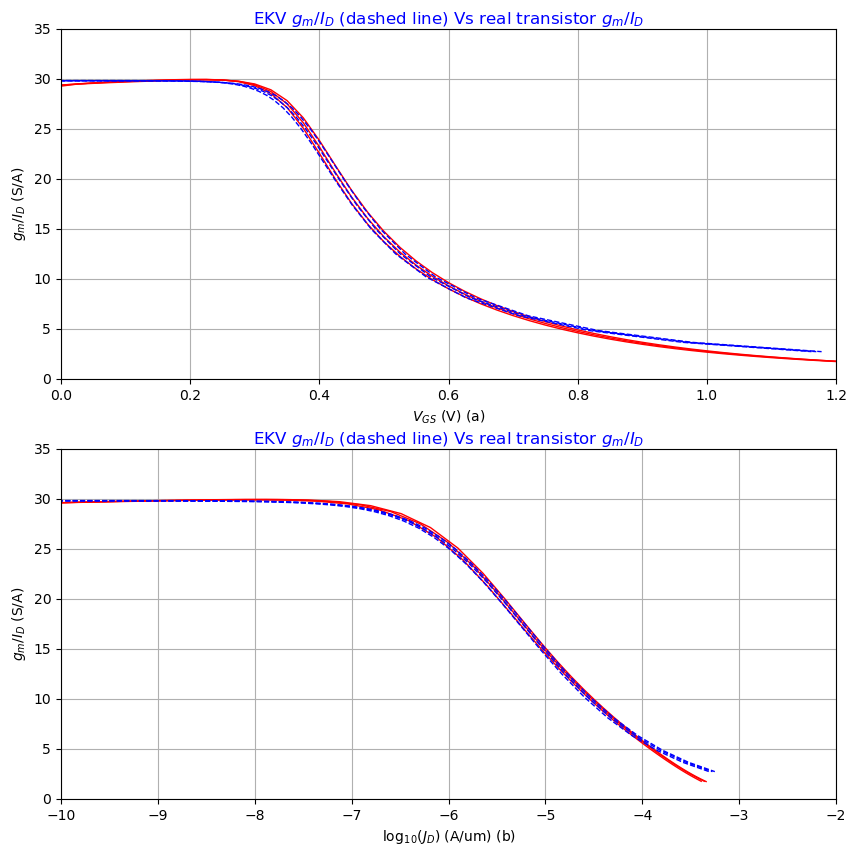

In [56]:
# % plot ====================
plt.rcParams.update(plt.rcParamsDefault)
fig, axs = plt.subplots(2,1,figsize=(10,10))
# **********************************************************
label1 = f'L = {L} nm & VDS = {VDS[0]} V'
label2 = f'L = {L} nm & VDS = {VDS[1]} V'
label3 = f'L = {L} nm & VDS = {VDS[2]} V'

# **********************************************************
title_dict = dict(fontsize=12, fontweight=2, color="blue", verticalalignment='center', horizontalalignment='center')
bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)

# **********************************************************
axs[0].plot(VGS_lut, gm_ID, 'r-', linewidth=1)
axs[0].grid(True)
axs[0].plot(VG, gm_Id, 'b--', linewidth=1)

axs[0].set_xlabel(f'$V_G$$_S$ (V) (a)')
axs[0].set_ylabel(f'$g_m$/$I_D$ (S/A)')

axs[0].set_ylim(bottom=0, top=35)
axs[0].set_xlim(left=0, right=1.2)
axs[0].set_title(f'EKV $g_m$/$I_D$ (dashed line) Vs real transistor $g_m$/$I_D$', title_dict)

axs[1].plot(np.log10(JD), gm_ID, 'r-', linewidth=1)
axs[1].grid(True)
axs[1].plot(np.log10(Id), gm_Id, 'b--', linewidth=1)

axs[1].set_xlabel(f'log$_1$$_0$($J_D$) (A/um) (b)')
axs[1].set_ylabel(f'$g_m$/$I_D$ (S/A)')

axs[1].set_ylim(bottom=0, top=35)
axs[1].set_xlim(left=-10, right=-2)
axs[1].set_title(f'EKV $g_m$/$I_D$ (dashed line) Vs real transistor $g_m$/$I_D$', title_dict)

if save_Figs:
    dpi = 600
    fig_EKV_J_D_2_14 = filepath_dir_fig + f'\\Fig_2_14_EKV_gm_ID_Vs_Real_Transistors_gm_ID_65nm_jba'
    print(f"Saving figure: {fig_EKV_J_D_2_14}")
    plt.savefig(fig_EKV_J_D_2_14 + '.png', dpi = dpi, bbox_inches='tight')

plt.show()
# **************************************************************

**`Figure 2.14 compares the transconductance efficiency curves. We use (2.29) to evaluate the transconductance efficiency predicted by the basic EKV model and compare the result to the lookup table curves, considering the real transistors characteristics above with L = 100 nm (VDS = 0.6, 0.9 and 1.2 V).`**  
  
**As we see in from the plots, the agreement is very good from strong to weak inversion, regardless of whether we plot gm/ID versus VGS (Figure 2.14(a) or versus JD (Figure 2.14(b)).**  
*Also, note that the influence of VDS is very small; the three curves for different VDS are very close to one another and are almost indistinguishable.*  
  
**`Finally, we note again that the reconstructed characteristics depart significantly from the real gm/ID only in strong inversion and deep in weak inversion (for the reasons explained earlier).`**

### **Consider a scenario where we would like to operate the device at gm/ID = 15 S/A and want to assess the required current density.**  
  
Graphically, we would find JD by drawing a horizontal line at 15 S/A in Figure 2.14(b) and looking up the abscissa values for the each of the three curves (VDS = 0.6, 0.9 and 1.2 V).  
Using Python/Matlab, we can find the numerical values using the following code:


In [57]:
VDS = np.array([0.6, 0.9, 1.2])
gm_ID = NCH.look_up('GM_ID',VDS=VDS, L=0.1)
JD = NCH.look_up('ID_W',VDS=VDS, L=0.1)

JD1 = np.zeros((len(VDS),1))
for k in range(0,len(VDS)):
    print(f"VDS[{k}] = {VDS[k]}\n")
    JD1[k,0] = interp1d(gm_ID[:,k], JD[:,k], kind='cubic')(15)    
JD1 = to1D(np.array(JD1))
print(f"JD1 = {JD1}\n")

VDS[0] = 0.6

VDS[1] = 0.9

VDS[2] = 1.2

JD1 = [9.00331081e-06 9.66710953e-06 1.01627221e-05]



In [61]:
VDS = np.array([0.6, 0.9, 1.2])
gm_ID = NCH.look_up('GM_ID',VDS=VDS, L=0.1)
JD = NCH.look_up('ID_W',VDS=VDS, L=0.1)

JD1 = []
pchip=False
for k in range(0,len(VDS)):    
    set_interp = interp1d(gm_ID[:,k], JD[:,k], kind='cubic')
    JD_interp = set_interp(15)
    
    JD1.append(JD_interp)    
JD1 = to1D(np.array(JD1))
print(f"JD1 = {JD1}\n")

JD1 = [9.00331081e-06 9.66710953e-06 1.01627221e-05]



**`We find that JD1 is equal to`** **$9.09$, $9.86$** **`and`** **$10.32$ $\frac {\mu A}{\mu m}$.**  
  
*The corresponding variation from the mid-point is −7.8% and +4.7%, which is rather small, given the significant change in VDS and the relatively short channel length (100 nm).*  
  
**`This insensitivity can be explained by inspecting the basic EKV model equations.`**  
**We see from (2.29) that $g_m/I_D$ is directly linked to the normalized charge density $q$ and the subthreshold slope factor $n$. Constant $g_m/I_D$ implies that $q$ doesn’t change significantly with $V_{DS}$, since $n$ is almost constant. Consequently, the normalized drain current $i$ doesn’t change either, so that the net impact of $V_{DS}$ on $J_D$ is only due to changes in the specific current $I_S$.**


## **`Figure 2.15`**
  
**`Figure 2.15 focuses on another aspect of the transconductance efficiency. It concerns the decaying
behavior of the transconductance efficiency left to the circle that marks its maximum.`**  
  
**What we see in Figure 2.15 when |VGS| approaches 0.1 V is due to other effects that lead to a substantial departure from the weak inversion exponential model. One possible mechanism that could lead to the drop of $g_m/I_D$ is junction leakage. However, we have removed the junction leakage component from this plot.**  
  
**`What we see is in fact due to band-to-band tunneling (BT-BT) and gate-induced drain leakage (GIDL); see [9] for a detailed discussion. These effects become more visible with larger threshold voltage (hence smaller
diffusion current in the channel), and we therefore apply a backgate bias in Figure 2.15 to highlight
their impact more clearly. We will never bias a transistor in the region where BT-BT and GIDL play a
role, but we still need to pay attention to these effects for practical reasons related to table-lookup.
Suppose that we want to find VGS when gm/ID = 25 S/A in Figure 2.15. What we are looking for in this
case is the intersect with the right side of the curve, and not the GIDL/ BT-BT induced drop. The most
convenient measure to prevent issues is to systematically disregard data to the left of the maximum every
time we use the lookup function to find some quantity for a given value of gm/ ID.`**  

Section A. 2.4 provides more information on how we address this problem, which also applies to other quantities, like the device’s transit frequency.
 

In [62]:
# % data ===============
VDS = max(PCH['VDS'])/2
VGS_lut = PCH['VGS']
L_lut = PCH['L']
L_Min = min(L_lut)
dev_Temp = PCH['TEMP']
L   = 0.2
step = .3
VSB = 0.6

# % compute ==============
# % VGS   -->  gm/ID =======
gm_IDp = PCH.look_up('GM_ID',VGS=VGS_lut,VDS=VDS,VSB=VSB,L=L)
# [a, b] = max(gm_IDp)
# gm_IDp_max = gm_IDp(b);
gm_IDp_shape = np.shape(gm_IDp)
gm_IDp_dim = np.ndim(gm_IDp)
print(f"Gm_ID dimensions {gm_IDp_dim}")  # --> 2
print(f"Gm_ID dimensions {gm_IDp_shape}")  # --> (2,3) or 2 rows and 3 columns
gm_IDp_max = max(gm_IDp)
print(f"Gm_ID Maximum value = {gm_IDp_max}")  # --> 500
gm_IDp_maxindex = gm_IDp.argmax()
print(f"Gm_ID Maximum value index = {gm_IDp_maxindex}")  # --> 2
UGS   = VGS_lut[gm_IDp_maxindex]
print(f"Gm_ID Maximum value Vgs = {UGS}")

# % Another way to find VGS that gives maximum gm/ID
# VGS_pmax = interp1(gm_IDp, pch.VGS, gm_IDp_max);
VGS_pmax = interp1d(gm_IDp, VGS_lut, kind='cubic')(gm_IDp_max)
fT_pmax  = PCH.look_up('GM_CGG',GM_ID= gm_IDp_max, VDS=VDS, VSB=VSB, L=L)/(2*np.pi)
Av0_pmax = PCH.look_up('GM_GDS',GM_ID= gm_IDp_max, VDS=VDS, VSB=VSB, L=L)

# % gm/ID  -->  VGS ==========
step = 0.5
gm_ID = np.arange(3, 31+step,step)
# VGS = NCH.look_upVGS(GM_ID = 10, VDS = 0.6, VSB = 0.1, L = 0.18)
# print(f'VGS is: {VGS}')
VGS = PCH.look_upVGS(GM_ID= gm_ID, VDS=VDS, VSB=VSB, L=L)

gmID_18 = 18
# VGS_15 = interp1(gm_ID, VGS, gmID_18);
VGS_18 = interp1d(gm_ID, VGS, kind='cubic')(gmID_18)

fT  = PCH.look_up('GM_CGG',GM_ID= gm_ID, VDS=VDS, VSB=VSB, L=L)/(2*np.pi)
Av0 = PCH.look_up('GM_GDS',GM_ID= gm_ID, VDS=VDS, VSB=VSB, L=L)

# fT_15 = interp1(gm_ID, fT, gmID_18)
fT_18 = interp1d(gm_ID, fT, kind='cubic')(gmID_18)
# Av0_15 = interp1(gm_ID, Av0, gmID_18);
Av0_18 = interp1d(gm_ID, Av0, kind='cubic')(gmID_18)

Gm_ID dimensions 1
Gm_ID dimensions (49,)
Gm_ID Maximum value = 31.41566469879236
Gm_ID Maximum value index = 13
Gm_ID Maximum value Vgs = 0.325


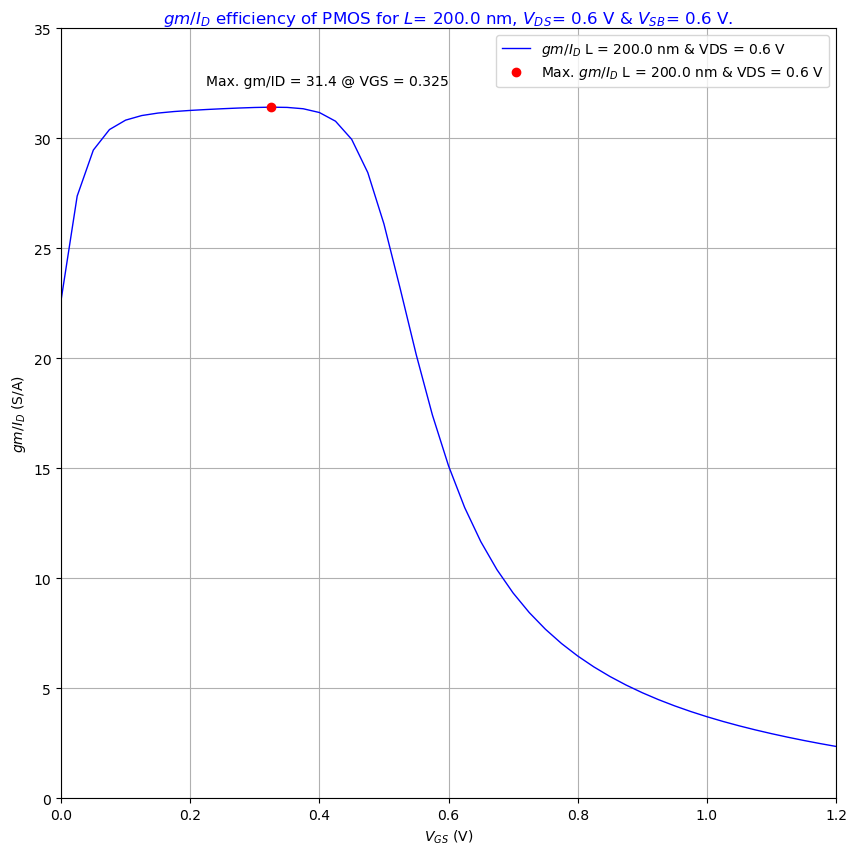

   L (nm)  VDS (V)  VSB (V)  gm/IDmax (S/A)  VGS_pmax (V)  fT_pmax (GHz)  \
0   200.0      0.6      0.6       31.415665         0.325        0.00815   

   Av0_pmax (V/V)  gm/ID=18 (S/A)  VGS_18 (V)  fT_18 (GHz)  Av0_18 (V/V)  
0       62.804626              18    0.569442     2.580613     36.044544  


In [64]:
# % plot ====================
plt.rcParams.update(plt.rcParamsDefault)
fig, axs = plt.subplots(1,1,figsize=(10,10))
label1 = f'$gm$/$I_D$ L = {L*1000} nm & VDS = {VDS} V'
label2 = f'Max. $gm$/$I_D$ L = {L*1000} nm & VDS = {VDS} V'

title_dict = dict(fontsize=12, fontweight=2, color="blue", verticalalignment='center', horizontalalignment='center')
bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)

axs.plot(VGS_lut, gm_IDp, 'b', linewidth=1, label = label1)
axs.grid(True)
axs.plot(UGS, gm_IDp_max, 'ro', linewidth=1, label = label2)

axs.set_ylabel(f'$gm$/$I_D$ (S/A)')
axs.set_xlabel(f'$V_G$$_S$ (V)')

axs.set_ylim(bottom=0, top=35)
axs.set_xlim(left=0, right=1.2)

axs.annotate(f'Max. gm/ID = {gm_IDp_max:.1f} @ VGS = {UGS}',((UGS-0.1), (gm_IDp_max+1)))

axs.legend()

axs.set_title(f'$gm$/$I_D$ efficiency of PMOS for $L$= ${L*1000}$ nm, $V_D$$_S$= ${VDS}$ V & $V_S$$_B$= ${VSB}$ V.', title_dict)

if save_Figs:
    dpi = 600
    fig_EKV_J_D_2_15 = filepath_dir_fig + f'\\Fig_2_15_PMOS_gm_ID_for_L_200nm_VDS_VSB_600mV_65nm_jba'
    print(f"Saving figure: {fig_EKV_J_D_2_15}")
    plt.savefig(fig_EKV_J_D_2_15 + '.png', dpi = dpi, bbox_inches='tight')

plt.show()

T_Fig_2_15_PMOS_res = pd.DataFrame({"L (nm)": L*1e3, "VDS (V)": VDS, "VSB (V)": VSB, "gm/IDmax (S/A)": gm_IDp_max, "VGS_pmax (V)": float(VGS_pmax), "fT_pmax (GHz)": fT_pmax*1e-9, "Av0_pmax (V/V)": float(Av0_pmax), "gm/ID=18 (S/A)": gmID_18, "VGS_18 (V)": float(VGS_18), "fT_18 (GHz)": float(fT_18)*1e-9, "Av0_18 (V/V)": float(Av0_18)}, index=[0])

print(T_Fig_2_15_PMOS_res)

**`What we see is in fact due to band-to-band tunneling (BT-BT) and gate-induced drain leakage (GIDL); see [9] for a detailed discussion. These effects become more visible with larger threshold voltage (hence smaller
diffusion current in the channel), and we therefore apply a backgate bias in Figure 2.15 to highlight
their impact more clearly. We will never bias a transistor in the region where BT-BT and GIDL play a
role, but we still need to pay attention to these effects for practical reasons related to table-lookup.
Suppose that we want to find VGS when gm/ID = 25 S/A in Figure 2.15. What we are looking for in this
case is the intersect with the right side of the curve, and not the GIDL/ BT-BT induced drop. The most
convenient measure to prevent issues is to systematically disregard data to the left of the maximum every
time we use the lookup function to find some quantity for a given value of gm/ ID.`**  

Section A. 2.4 provides more information on how we address this problem, which also applies to other quantities, like the device’s transit frequency.

In [65]:
gmIDp_25 = 25
gm_IDp_maxindex = gm_IDp.argmax()
print(f"Gm_ID Maximum value index = {gm_IDp_maxindex}\n")  
VGS_p = PCH["VGS"]

print_First20vals = True
if print_First20vals:
    print(f"Non monotonic gm_ID!\n gm_ID First 20 values:\n {np.round(gm_IDp[0:20],1)} S/A\n")
    print(f" VSG_p First 20 values:\n {np.round(VGS_p[0:20],3)} V\n")

print(f"Due to the Non-Monotonicity of gm_ID, the interp1d returns a wrong VGS value for gm_ID=25,\n \
since there are two points with this y-value!\n")
VGSp_25 = interp1d(gm_IDp, VGS_p, kind='cubic')(gmIDp_25)
print(f"VGSp_25 = {VGSp_25*1e3:.1f} mV.\n")

print(f"Limiting gm_ID to values to the left of Maximum:\n")
VGSp_25 = interp1d(gm_IDp[0:gm_IDp_maxindex], VGS_p[0:gm_IDp_maxindex], kind='cubic')(gmIDp_25)
print(f"VGSp_25 = {VGSp_25*1e3:.1f} mV.\n")

print(f"Limiting gm_ID to values to the right of Maximum (What indeed matters):\n")
VGSp_25 = interp1d(gm_IDp[gm_IDp_maxindex:], VGS_p[gm_IDp_maxindex:], kind='cubic')(gmIDp_25)
print(f"VGSp_25 = {VGSp_25*1e3:.1f} mV.\n")

Gm_ID Maximum value index = 13

Non monotonic gm_ID!
 gm_ID First 20 values:
 [22.6 27.4 29.5 30.4 30.8 31.  31.1 31.2 31.3 31.3 31.3 31.4 31.4 31.4
 31.4 31.3 31.2 30.8 30.  28.4] S/A

 VSG_p First 20 values:
 [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475] V

Due to the Non-Monotonicity of gm_ID, the interp1d returns a wrong VGS value for gm_ID=25,
 since there are two points with this y-value!

VGSp_25 = 1025.2 mV.

Limiting gm_ID to values to the left of Maximum:

VGSp_25 = 14.6 mV.

Limiting gm_ID to values to the right of Maximum (What indeed matters):

VGSp_25 = 510.9 mV.



## **`The Drain Saturation Voltage VDsat of Real Transistors`**  
  
Does the basic EKV model allow us to model other important parameters? Consider the drain saturation voltage VDsat that was briefly introduced in Section 2.1.2. Defining the drain saturation voltage of real transistors is less obvious than with the CSM model, since the drain current continues to increase with VDS in saturation. The expression of the drain saturation voltage below, which we advocate in this book, links VDsat to the reciprocal of the transconductance efficiency, and thus the inversion level of the transistor.
  
$V_{Dsat} = 2 / (g_m/I_D)$ `(2.34)`

**In weak inversion, since $g_m/I_D = 1/(nU_T)$, (2.34) boils down to $2nU_T$, typically near 50 mV at room temperature. In strong inversion, $V_{Dsat}$ is equal to the gate overdrive since according to (2.33), $g_m/I_D = 2/(V_G – V_T)$.**  
**`While constant in weak inversion, the drain saturation voltage increases with the gate-to-source voltage in strong inversion. This is illustrated in Figure 2.16 by the asterisks, which mark the drain saturation voltage on every ID(VDS) characteristic.`** 

The data were obtained by running the code below:

In [77]:
# % data ===============
# VDSi = max(NCH['VDS'])/2
VDSi = 0.6
VGS_lut = NCH['VGS']
L_lut = NCH['L']
L_Min = min(L_lut)
dev_Temp = NCH['TEMP']
L   = 0.1
step_vgs = 0.1
step_vds = 0.015
VGS = np.arange(0.3, 1.0+step_vgs, step_vgs)
VDS = np.arange(0.001, 1.2, step_vds)
VSB = 0

# % compute ==============
# % VDsat and JDsat (lookup funct) for Real Transistor 
gm_ID = NCH.look_up('GM_ID', VGS=VGS, VDS=VDSi, L=L)
gm_ID_shape = gm_ID.shape[0]
gm_ID = gm_ID.reshape(gm_ID_shape, 1)
print(f"gm_ID shape = {gm_ID.shape}")
VDsat = 2/gm_ID
JDsat = np.diag(NCH.look_up('ID_W',VDS=VDsat,VGS=VGS, L=L))
JDsat = JDsat.reshape(gm_ID_shape, 1)

# % EKV model ===============================================
rho = 0.6
(VDS_EKV1, n_EKV1, VT_EKV1, JS_EKV1, d1n_EKV1, d1VT_EKV1, d1logJS_EKV1, d2n_EKV1, \
 d2VT_EKV1, d2logJS_EKV1) = EKV_param_extraction(NCH, mode = 1, L = L, VDS = VDsat, VSB = 0, rho=rho)

n  = n_EKV1 # subthreshold slope factor
VT = VT_EKV1 # threshold voltage
JS = JS_EKV1 # Specific current density ( Is when W = 1um)

VGS_s = VGS.reshape(gm_ID_shape,1)
VP = (VGS_s - VT)/n
UT = .026
Z_invq = VP/UT
qs = invq(VP/UT)

VDsat_EKV = 2*UT*n*(1 + qs)

JDsat_EKV = JS*(qs**2 + qs)
# % The result VDsat_EKV and JDsat_EKV conforms rather well with the apparent VDsat of the real transistor,
# % except for deep in strong inversion, because the model ignores mobility degradation.

# T_Fig_2_16_EKV_res = pd.DataFrame({"gm/ID (S/A)": gm_ID*1e3, "VDSat (V)": VDsat, "JDsat (uA/um)": JDsat*1e6, "n": n, "VT (V)": VT, "JS (uA/um)": JS*1e6, "VP (V)": VP, "qs": qs, "VDsat_EKV (V)": VDsat_EKV, "JDsat_EKV (uA/um)": JDsat_EKV*1e6})
T_Fig_2_16_EKV_res = pd.DataFrame({"gm/ID (S/A)": to1D(gm_ID), "VDSat (V)": to1D(VDsat),\
    "JDsat (uA/um)": to1D(JDsat)*1e6, "n": to1D(n), "VT (V)": to1D(VT), "JS (uA/um)": to1D(JS)*1e6,\
    "VP (V)": to1D(VP), "qs": to1D(qs), "VDsat_EKV (V)": to1D(VDsat_EKV),\
    "JDsat_EKV (uA/um)": to1D(JDsat_EKV)*1e6})

print(T_Fig_2_16_EKV_res)

N = len(VDS)
# JD = lookup(nch,'ID_W','VDS',VDS,'VGS',VGS,'L',L);
JD = NCH.look_up('ID_W',VDS=VDS,VGS=VGS, L=L)
# % Cutting the plot of JD into two sections JD1 and JD2 to place VGS
# % values in between the two section in Fig. 2.16!!
N1 = 55
VDS1 = VDS[1:N1]
JD1 = JD[:,1:N1]
N2 = 73
VDS2 = VDS[N2:N]
JD2 = JD[:,N2:N]

gm_ID shape = (8, 1)
   gm/ID (S/A)  VDSat (V)  JDsat (uA/um)         n    VT (V)  JS (uA/um)  \
0    29.475414   0.067853       0.039833  1.298248  0.502450    2.408452   
1    23.830450   0.083926       0.693173  1.297852  0.505586    2.770123   
2    14.733887   0.135742       5.915561  1.296705  0.508896    3.395633   
3     9.608971   0.208139      23.171707  1.295400  0.507236    3.696114   
4     6.719047   0.297661      58.424858  1.294196  0.504289    3.926428   
5     4.883951   0.409504     113.557488  1.293108  0.500940    4.156527   
6     3.644285   0.548804     185.929099  1.292138  0.497096    4.386617   
7     2.787111   0.717589     270.005103  1.291301  0.492717    4.611918   

     VP (V)        qs  VDsat_EKV (V)  JDsat_EKV (uA/um)  
0 -0.155941  0.017718       0.068705           0.043429  
1 -0.081354  0.211726       0.081777           0.710687  
2 -0.006860  0.913376       0.129016           5.934313  
3  0.071610  2.024469       0.203731          22.631089  
4  0

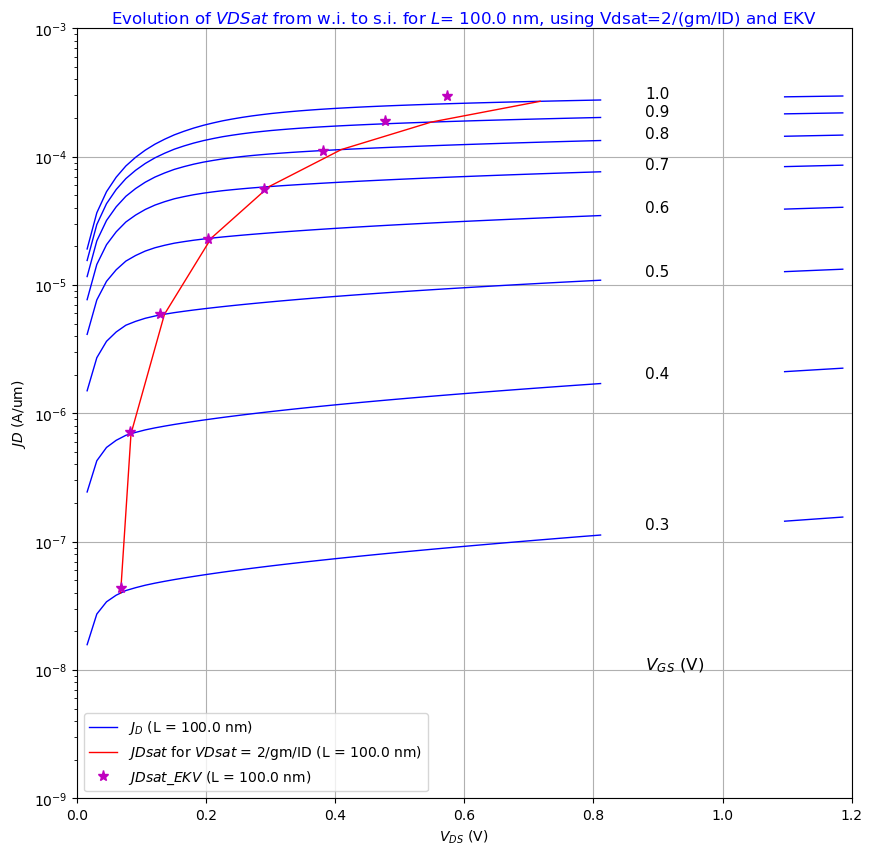

In [78]:
# % plot ====================
plt.rcParams.update(plt.rcParamsDefault)
fig, axs = plt.subplots(1,1,figsize=(10,10))
# ***************************************************************
label1 = f'$J_D$ (L = {L*1000} nm)'
label2 = f'$JDsat$ for $VDsat$ = 2/gm/ID (L = {L*1000} nm)'
label3 = f'$JDsat$_$EKV$ (L = {L*1000} nm)'
# ***************************************************************

title_dict = dict(fontsize=12, fontweight=2, color="blue", verticalalignment='center', horizontalalignment='center')
bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)

# ***************************************************************
JD1_plot = JD1.T
axs.semilogy(VDS1, JD1_plot[:,0], 'b', linewidth=1, label = label1)
axs.semilogy(VDS1, JD1_plot[:,1:], 'b', linewidth=1)
axs.grid(True)
axs.semilogy(VDS2, JD2.T, 'b', linewidth=1)
axs.semilogy(VDsat, JDsat, 'r', linewidth=1, label = label2)
axs.semilogy(VDsat_EKV, JDsat_EKV, 'm*', linewidth=1, markersize=8, label = label3)

axs.set_ylabel(f'$JD$ (A/um)')
axs.set_xlabel(f'$V_D$$_S$ (V)')

axs.set_ylim(bottom=1e-9, top=1e-3)
axs.set_xlim(left=0, right=1.2)

# ***************************************************************
axs.annotate(f'{VGS[0]:.1f}',((0.88), (JD[0,62])), fontsize=11)
axs.annotate(f'{VGS[1]:.1f}',((0.88), (JD[1,62])), fontsize=11)
axs.annotate(f'{VGS[2]:.1f}',((0.88), (JD[2,62])), fontsize=11)
axs.annotate(f'{VGS[3]:.1f}',((0.88), (JD[3,62])), fontsize=11)
axs.annotate(f'{VGS[4]:.1f}',((0.88), (JD[4,62])), fontsize=11)
axs.annotate(f'{VGS[5]:.1f}',((0.88), (JD[5,62])), fontsize=11)
axs.annotate(f'{VGS[6]:.1f}',((0.88), (JD[6,62])), fontsize=11)
axs.annotate(f'{VGS[7]:.1f}',((0.88), (JD[7,62])), fontsize=11)
axs.annotate(f'$V_G$$_S$ (V)',((0.88), (1e-8)), fontsize=12)

axs.legend(loc = 'lower left')
axs.set_title(f'Evolution of $VDSat$ from w.i. to s.i. for $L$= ${L*1000}$ nm, using Vdsat=2/(gm/ID) and EKV', title_dict)

if save_Figs:
    dpi = 600
    fig_EKV_J_D_2_16 = filepath_dir_fig + f'\\Fig_2_16_VDSat_from_WI_to_SI_65nm_jba'
    print(f"Saving figure: {fig_EKV_J_D_2_16}")
    plt.savefig(fig_EKV_J_D_2_16 + '.png', dpi = dpi, bbox_inches='tight')

plt.show()
# **************************************************************

**`Figure 2.16 Evolution of VDsat from weak to strong inversion (L = 100 nm). The asterisks relate to (2.34), whereas the solid lines come from (2.35) and the basic EKV model.`**  
  
**Notice that the VDsat locus conforms nicely with the heuristic image of the saturation drain voltage. We see that in weak inversion, the predicted VDsat is almost constant between 50 and 100 mV, while in strong inversion, VDsat increases rapidly according to the approximate square-law expression above.**  
  
*`In terms of the EKV model, (2.34) boils down to a simple analytical expression after applying (2.29):`*  
 * $V_{Dsat} = 2 / (g_m/I_D)$ `(2.34)` 
 * $\frac{g_m}{I_D} = \frac{1}{nU_T} \frac{1}{q+1}$  `(2.29)`   
   
$V_{Dsat} = 2nU_T(1+q_s)$ `(2.35)`  
  
*`In weak inversion, since qs << 1, we see that VDsat approache 2nUT. For strong inversion, we find:`*  
  
$V_{Dsat} \approx 2 n U_T q_s \approx 2nU_T \sqrt {i} = 2nU_T \sqrt {I_D/I_S} = 2 n U_T \sqrt{J_D/J_S} = (V_G - V_T)$ `(2.36)`  

**`The result conforms rather well with the apparent VDsat of the real transistor, except for deep in strong inversion, because the model ignores mobility degradation.`**

## **`Impact of Bias Conditions on EKV parameters`**  
  
**In this section, we examine the impact that the gate length and drain voltage have on the basic EKV parameters.**  
  
**`We take advantage of the XTRACT function to assess n, VT and JS, considering a grounded-source n-channel transistor. The same procedure can be used to identify EKV parameters across process corners (Slow/Nominal/Fast) as illustrated in Section A.1.5 (see Appendix 1).`** 
  
**Figure 2.17 shows the extracted EKV threshold voltage versus the gate length of the n-channel transistor when the drain voltage is stepped from 0.5 to 1 V.**  
  
**`If the gate length is large (typically 1 μm), the threshold voltage doesn’t vary significantly with the drain voltage. As we move toward submicron transistors, this isn’t true any more. We see the threshold voltage increasing gradually at first. The dependence on VDS grows progressively until a rapid collapse of VT appears once the gate length gets smaller than 100 nm. This marks the so-called threshold voltage roll-off, which sets the limit of the technology (60 nm for the technology used in this book).`** 
  
*`Manufacturers make use of local ion implantations (called pocket implants) to combat the threshold voltage roll-off. This is done generally at the price of a slight increase of the threshold voltage that is visible in Figure 2.17 before the roll-off takes place. This is called reverse short channel effect.`*


In [79]:
# % data ===============
# *******************
int_tech = int(str_technology)
L = np.ones((35, 1))
print(int_tech)
if int_tech <= 65:    
    L[0:25] = np.arange(0.06,0.31,0.01).reshape(25,1)
else:    
    L[0:25] = np.arange(0.1,0.35,0.01).reshape(25,1)
L[25:31] = np.arange(0.4,0.7,0.05).reshape(6,1)
L[31:35] = np.arange(0.7,1.0,0.1).reshape(4,1)
# print(L[0:25])

65


### **`FIGURES 2.17 & 2.18`**

In [81]:
# VDSi = max(NCH['VDS'])/2
VDSi = 0.6
VGS_lut = NCH['VGS']
L_lut = NCH['L']
L_Min = min(L_lut)
dev_Temp = NCH['TEMP']

step_vds = 0.1
VDS = np.arange(0.5, 1.0+step_vds/2, step_vds)   # !!!Sometimes np.arange(0.5,1.0+0.1,0.1) includes 1.1!!!!
# rho = 0.6
VSB = 0

# % EKV param extraction algorithm ==================
# % XTRACT INPUTS =====================================
# % L, VSB are scalars
# % VDS scalar or column vector
# % rho reference        (optional scalar)

# % XTRACT OUTPUTS =====================================
# % y = [VDS n VT JS d1n d1VT d1logJS d2n d2VT d2logJS];
print(f'\t\t\tEKV XTRACT Function\n\n')
print(f'\ty = [VDS n VT JS d1n d1VT d1logJS d2n d2VT d2logJS]\n')
print(f'\tn --> subthreshold slope factor, VT --> threshold voltage,\n')
print(f'\tJS --> Specific current density ( Is when W = 1um)\n')
print(f'\tremaining parameters are the sensitivities of each parameter to Vds, 1st and 2nd derivatives.\n\n')

# % y  = XTRACT(nch,L,VDS,0,rho);
VT = np.zeros((len(VDS),len(L)))
pchip_interp = True
# pchip_interp = False
for k in range(0,len(L)):
    # y = XTRACT_v2(NCH,float(L[k]),VDS, VSB, pchip=pchip_interp)  # % [length(VDS  6]    
    # % EKV model ===============================================
    rho = 0.6
    (VDS_EKV, n_EKV, VT_EKV, JS_EKV, d1n_EKV, d1VT_EKV, d1logJS_EKV, d2n_EKV, \
    d2VT_EKV, d2logJS_EKV) = EKV_param_extraction(NCH, mode = 1, L = L[k], VDS = VDS, VSB = VSB, rho=rho)
    
    # ******************************************************************************************
    # ******************************************************************************************
    # ******************************************************************************************
    # !!! ATTENTION: interp1d cubic gives completely wrong VT, using PchipInterpolator better but forced to
    # discard gm_ID's to left of the maximum value in gm_ID array resulting from lookup with dev.VGS
    # ******************************************************************************************
    # ******************************************************************************************
    # ******************************************************************************************
    
    VT_i = VT_EKV # threshold voltage    
    VT[:,k] = np.reshape(VT_i,-1)  # threshold voltage, turn VT_i into 1D to fit in VT 1D slice.
    # JS = y[3]  # Specific current density ( Is when W = 1um)

# VT_max_array = max(VT)
VT_max = np.max(VT)
# VT_min_array = min(VT);
VT_min = np.min(VT)


			EKV XTRACT Function


	y = [VDS n VT JS d1n d1VT d1logJS d2n d2VT d2logJS]

	n --> subthreshold slope factor, VT --> threshold voltage,

	JS --> Specific current density ( Is when W = 1um)

	remaining parameters are the sensitivities of each parameter to Vds, 1st and 2nd derivatives.




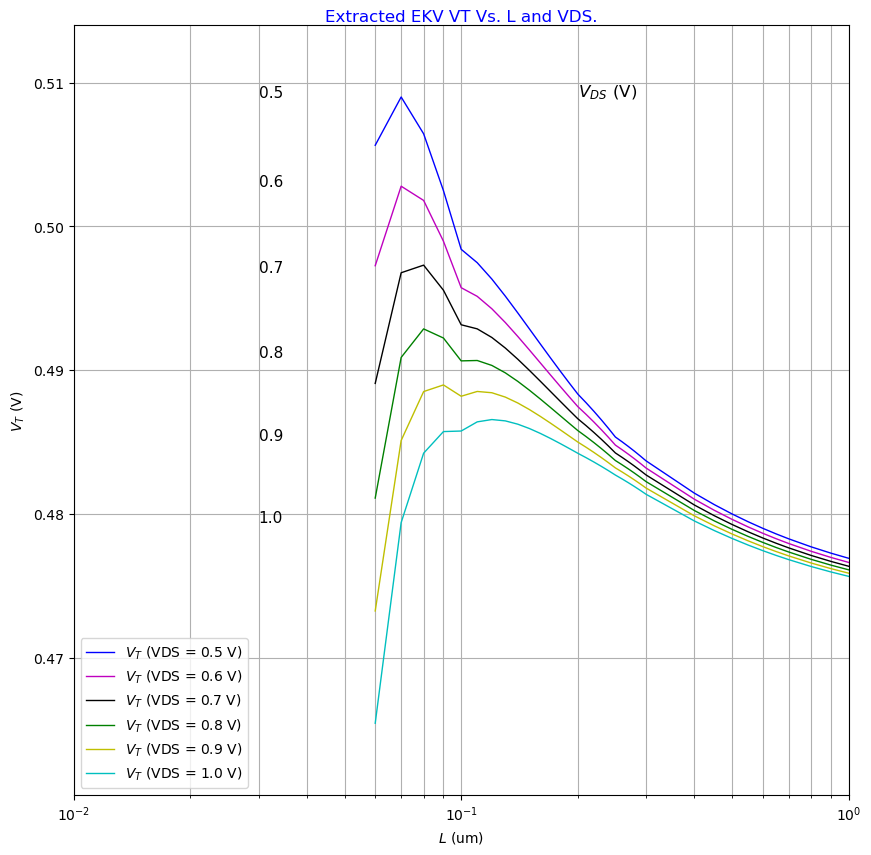

In [83]:
# % plot ====================
plt.rcParams.update(plt.rcParamsDefault)
fig, axs = plt.subplots(1,1,figsize=(10,10))
# ***************************************************
label1 = f'$V_T$ (VDS = {VDS[0]:.1f} V)'
label2 = f'$V_T$ (VDS = {VDS[1]:.1f} V)'
label3 = f'$V_T$ (VDS = {VDS[2]:.1f} V)'
label4 = f'$V_T$ (VDS = {VDS[3]:.1f} V)'
label5 = f'$V_T$ (VDS = {VDS[4]:.1f} V)'
label6 = f'$V_T$ (VDS = {VDS[5]:.1f} V)'

# ***************************************************
# If you want to disable both the offset and scientific notaion, you'd use
# ax.ticklabel_format(useOffset=False, style='plain').
axs.ticklabel_format(useOffset=False, style='plain')

# ***************************************************
title_dict = dict(fontsize=12, fontweight=2, color="blue", verticalalignment='center', horizontalalignment='center')
bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)

# ***************************************************
VT_plot = VT.T
axs.semilogx(L, VT_plot[:,0], 'b', linewidth=1, label = label1)
axs.grid(True, which="both")
axs.semilogx(L, VT_plot[:,1], 'm', linewidth=1, label = label2)
axs.semilogx(L, VT_plot[:,2], 'k', linewidth=1, label = label3)
axs.semilogx(L, VT_plot[:,3], 'g', linewidth=1, label = label4)
axs.semilogx(L, VT_plot[:,4], 'y', linewidth=1, label = label5)
axs.semilogx(L, VT_plot[:,5], 'c', linewidth=1, label = label6)

# ***************************************************
axs.set_ylabel(f'$V_T$ (V)')
axs.set_xlabel(f'$L$ (um)')

axs.set_ylim(bottom=(VT_min-0.005), top=(VT_max+0.005))
axs.set_xlim(left=1e-2, right=1)

# ***************************************************
axs.annotate(f'{VDS[0]:.1f}',((0.5*L_Min), (VT[0,1])), fontsize=11)
axs.annotate(f'{VDS[1]:.1f}',((0.5*L_Min), (VT[1,1])), fontsize=11)
axs.annotate(f'{VDS[2]:.1f}',((0.5*L_Min), (VT[2,1])), fontsize=11)
axs.annotate(f'{VDS[3]:.1f}',((0.5*L_Min), (VT[3,1])), fontsize=11)
axs.annotate(f'{VDS[4]:.1f}',((0.5*L_Min), (VT[4,1])), fontsize=11)
axs.annotate(f'{VDS[5]:.1f}',((0.5*L_Min), (VT[5,1])), fontsize=11)
axs.annotate(f'$V_D$$_S$ (V)',((0.5*L[25]), (VT_max)), fontsize=12)

# ***************************************************
axs.legend(loc = 'lower left')
axs.set_title(f'Extracted EKV VT Vs. L and VDS.', title_dict)

if save_Figs:
    dpi = 600
    fig_EKV_J_D_2_17 = filepath_dir_fig + f'\\Fig_2_17_EKV_VT_Vs_L_and_VDS_65nm_jba'
    if pchip_interp:
        fig_EKV_J_D_2_17 = fig_EKV_J_D_2_17 + "_pchip"
    print(f"Saving figure: {fig_EKV_J_D_2_17}")
    plt.savefig(fig_EKV_J_D_2_17 + '.png', dpi = dpi, bbox_inches='tight')

plt.show()
# ***************************************************

**`While pocket implants enable us to increase the achievable operating frequencies by making shorter gate lengths feasible, the anisotropy they create unfortunately impacts the sensitivity of VT regarding the drain voltage. This is clearly visible in Figure 2.17 and emphasized further in Figure 2.18, which displays similar data, exchanging L and VDS.`**  
  

In [84]:
L   = np.array([0.06, 0.08, 0.1, 0.15, 0.2, 1])

# VDSi = max(NCH['VDS'])/2
VDSi = 0.6
VGS_lut = NCH['VGS']
L_lut = NCH['L']
L_Min = min(L_lut)
dev_Temp = NCH['TEMP']

step_vds = 0.025
VDS = np.arange(0.2, 1.2+step_vds/2, step_vds)   # !!!Sometimes np.arange(0.5,1.0+0.1,0.1) includes 1.1!!!!
# rho = 0.6
VSB = 0

# % EKV param extraction algorithm ==================
# % XTRACT INPUTS =====================================
# % L, VSB are scalars
# % VDS scalar or column vector
# % rho reference        (optional scalar)

# % XTRACT OUTPUTS =====================================
# % y = [VDS n VT JS d1n d1VT d1logJS d2n d2VT d2logJS];
print(f'\t\t\tEKV XTRACT Function\n\n')
print(f'\ty = [VDS n VT JS d1n d1VT d1logJS d2n d2VT d2logJS]\n')
print(f'\tn --> subthreshold slope factor, VT --> threshold voltage,\n')
print(f'\tJS --> Specific current density ( Is when W = 1um)\n')
print(f'\tremaining parameters are the sensitivities of each parameter to Vds, 1st and 2nd derivatives.\n\n')

# % y  = XTRACT(nch,L,VDS,0,rho);
pchip_interp = True
# pchip_interp = False
VT = np.zeros((len(VDS),len(L)))
for k in range(0,len(L)):
    # y = XTRACT(NCH,float(L[k]),VDS, VSB, lut_65nm=lut_65nm)  # % [length(VDS  6]
    y = XTRACT_v2(NCH,L[k],VDS, VSB, pchip = pchip_interp)
    # n  = y[1]  # subthreshold slope factor
    VT_i = y[2]  # threshold voltage
    VT[:,k] = np.reshape(VT_i,-1)  # turn VT_i into 1D to fit in VT 1D slice.
    # JS = y[3]  # Specific current density ( Is when W = 1um)

# DONE: IMPORTANT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# TODO: Find why the threshold voltage VT returned from my XTRACT is different from the VT from Matlab XTRACT!!!! Matlab gives approx. 20mV higher VT!!
# !!!!!! XTRACT rho was default 0.8, close to w.i.(1), instead of 0.6 as in Matlab (mode. inv.) !!!!!!
# DONE: IMPORTANT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

VT_max = np.max(VT)
VT_min = np.min(VT)
print(f"Max. Vth = {VT_max}")
print(f"Min. Vth = {VT_min}")

# % VT change for Lmin in range VDS = (.2: .025: 1.2)';
dVT_Lmin_mV = (VT[0,0] - VT[-1,0])*1e3

# % VT change for Lmax in range VDS = (.2: .025: 1.2)';
dVT_Lmax_mV = (VT[0,-1] - VT[-1,-1])*1e3
print(f"dVT_Lmin_mV = {dVT_Lmin_mV}")
print(f"dVT_Lmax_mV = {dVT_Lmax_mV}")

			EKV XTRACT Function


	y = [VDS n VT JS d1n d1VT d1logJS d2n d2VT d2logJS]

	n --> subthreshold slope factor, VT --> threshold voltage,

	JS --> Specific current density ( Is when W = 1um)

	remaining parameters are the sensitivities of each parameter to Vds, 1st and 2nd derivatives.




NameError: name 'XTRACT_v2' is not defined